In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from imblearn.under_sampling import RandomUnderSampler

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [4]:
import keras
print(keras.__version__)

import keras_tuner as kt
print(kt.__version__)

2.15.0
1.4.6


so_minmax.csv 파일을 df 파일로 저장 하였음. 

In [5]:
import pandas as pd

# 파일 경로 지정
file_path = 'C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_minmax.csv'

# read_csv 메서드를 사용하여 CSV 파일을 데이터프레임으로 불러옴
df = pd.read_csv(file_path)

# 불러온 데이터프레임 확인
print(df.head())


        Age    Height    Weight   Bodyfat       DBP       SBP      Grip  \
0  0.043478  0.676471  0.909134  0.356713  0.250000  0.395604  0.968354   
1  0.347826  0.137255  0.052532  0.342685  0.392857  0.131868  0.409283   
2  0.565217  0.311275  0.255088  0.452906  0.428571  0.373626  0.358650   
3  0.304348  0.056373  0.574539  0.809619  0.571429  0.439560  0.327004   
4  0.478261  0.450980  0.548982  0.507014  0.553571  0.725275  0.767932   

   NormalGrip  sitreach      BMI  ...       TUG  8walktestsec  relativegrip  \
0    0.845371  0.615385  0.74375  ...  0.413897      0.500939      0.710167   
1    0.424212  0.457692  0.26250  ...  0.376133      0.432219      0.625190   
2    0.416073  0.636538  0.37500  ...  0.906344      0.737514      0.476480   
3    0.355036  0.692308  0.99375  ...  0.498489      0.609839      0.267071   
4    0.709054  0.490385  0.58125  ...  0.496979      0.549380      0.707132   

   Height_m  gender_numeric       ASM  ASM_by_Weight  ASM_by_Weight_perc  

In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check available GPU devices
print("Available GPU devices:")
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)

# Check available CPU devices
print("Available CPU devices:")
cpus = tf.config.list_physical_devices('CPU')
for cpu in cpus:
    print(cpu)

# Get a more detailed list of devices available to TensorFlow
print("All devices available to TensorFlow:")
print(device_lib.list_local_devices())

TensorFlow version: 2.15.0
Available GPU devices:
Available CPU devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
All devices available to TensorFlow:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13482110316966833572
xla_global_id: -1
]


In [8]:
df.columns

Index(['Age', 'Height', 'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip',
       'NormalGrip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'relativegrip', 'Height_m', 'gender_numeric', 'ASM',
       'ASM_by_Weight', 'ASM_by_Weight_perc', 'group', 'group_numberic'],
      dtype='object')

In [ ]:
X = df[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'ASM_by_Weight_perc']

In [5]:
import numpy as np
import pandas as pd
import os
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'df' is your DataFrame loaded with scaled data
data = df

# Define X and y
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip', 'sitreach', 'sitstand', '2minstepcount', 'TUG', '8walktestsec']]
y = data['group_numberic']

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Set the directory path for the tuner
model_save_dir = "C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/my_dir"
new_project_name = "/new_intro_to_kt"
new_directory_path = os.path.join(model_save_dir, new_project_name)

# 디렉토리가 존재하는지 확인하고 없으면 생성
if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path, exist_ok=True)
    print(f"Created new directory at '{new_directory_path}'")
else:
    print(f"Directory already exists at '{new_directory_path}'")


def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_0', min_value=32, max_value=300, step=32), activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_0', min_value=0.0, max_value=0.5, step=0.1)))

    # 두 번째 Dense 레이어 추가
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=300, step=32), activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # 모델 컴파일
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # 배치 크기를 하이퍼파라미터로 추가
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128])
    
    return model

# 튜너 객체 생성
new_tuner = kt.Hyperband(model_builder,
                         objective='val_accuracy',
                         max_epochs=200,
                         factor=3,
                         directory=new_directory_path,
                         project_name='new_my_kt_project',
                         overwrite=True)

# EarlyStopping과 ModelCheckpoint 콜백 정의
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #좀 더 정확히 할려면 patience 값을 줄이면됨
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(new_directory_path, 'best_model.keras'), 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# 하이퍼파라미터 검색 실행
new_tuner.search(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[stop_early, model_checkpoint])

# 튜닝된 모델에서 최적의 에포크 수 추출
best_trial = new_tuner.oracle.get_best_trials(num_trials=1)[0]
best_epoch = best_trial.score

# 최적 하이퍼파라미터 얻기
best_hps = new_tuner.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터를 사용하여 모델을 재구성
model = model_builder(best_hps)

# 모델 훈련과 최적의 에포크 계산
history = model.fit(
    X_train, y_train, 
    batch_size=best_hps.get('batch_size'),
    epochs=200, 
    validation_split=0.2, 
    callbacks=[stop_early, model_checkpoint]
)

# 최적의 에포크 계산
best_epoch = np.argmax(history.history['val_accuracy']) + 1

# 훈련된 최적 모델 저장 위치 수정 (ModelCheckpoint가 저장한 모델 사용)
best_model_path = os.path.join(new_directory_path, 'best_model.keras')

# 최적 모델 정보 출력
print(f"The optimal number of epochs is: {best_epoch}")
print(f"The best model is saved at '{best_model_path}'")

# 모델 저장
model.save(best_model_path)
print(f"Model saved at '{best_model_path}'")

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units_0')}")
print(f"The optimal number of units in the second densely-connected layer is {best_hps.get('units_1')}")
print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")
print(f"The optimal dropout rate for the first layer is {best_hps.get('dropout_0')}")
print(f"The optimal dropout rate for the second layer is {best_hps.get('dropout_1')}")
print(f"The optimal batch size is: {best_hps.get('batch_size')}")



Trial 254 Complete [00h 00m 18s]
val_accuracy: 0.9289305806159973

Best val_accuracy So Far: 0.9311655163764954
Total elapsed time: 00h 36m 22s
Epoch 1/200
1119/1119 [==============================] - 1s 893us/step - loss: 0.2196 - accuracy: 0.9130 - val_loss: 0.2176 - val_accuracy: 0.9145
Epoch 2/200
1119/1119 [==============================] - 1s 880us/step - loss: 0.2017 - accuracy: 0.9228 - val_loss: 0.2041 - val_accuracy: 0.9219
Epoch 3/200
1119/1119 [==============================] - 1s 815us/step - loss: 0.1963 - accuracy: 0.9257 - val_loss: 0.2108 - val_accuracy: 0.9194
Epoch 4/200
1119/1119 [==============================] - 1s 810us/step - loss: 0.1941 - accuracy: 0.9259 - val_loss: 0.2003 - val_accuracy: 0.9243
Epoch 5/200
1119/1119 [==============================] - 1s 813us/step - loss: 0.1929 - accuracy: 0.9261 - val_loss: 0.2065 - val_accuracy: 0.9233
Epoch 6/200
1119/1119 [==============================] - 1s 846us/step - loss: 0.1890 - accuracy: 0.9284 - val_loss: 0.19

350/350 [==============================] - 0s 526us/step


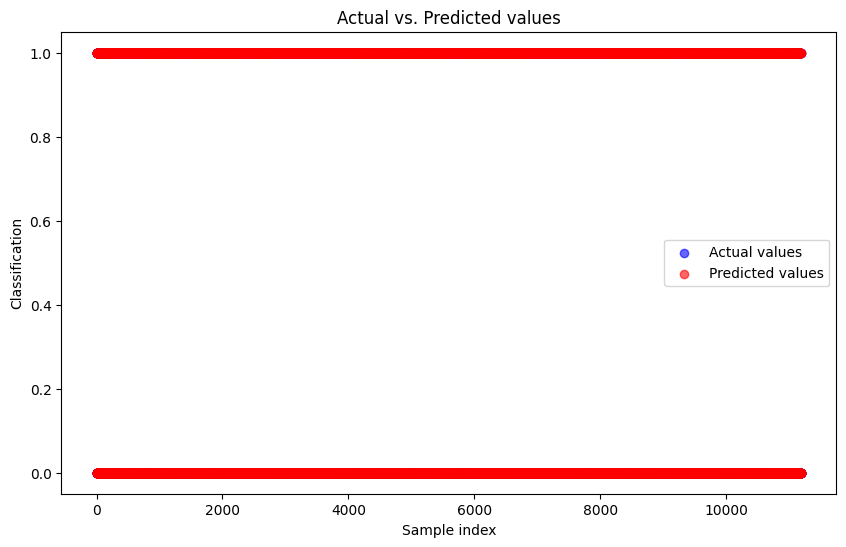

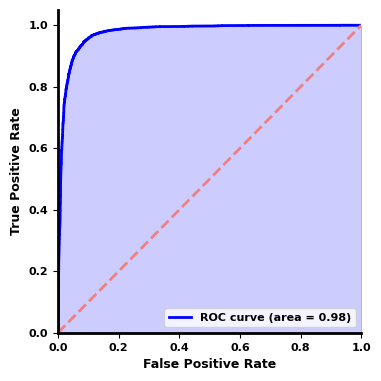

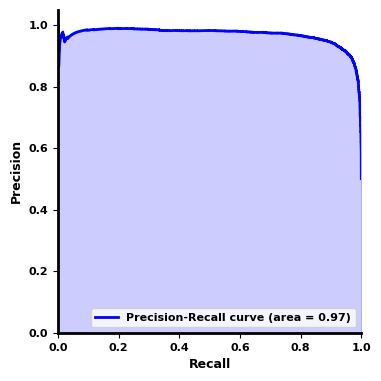

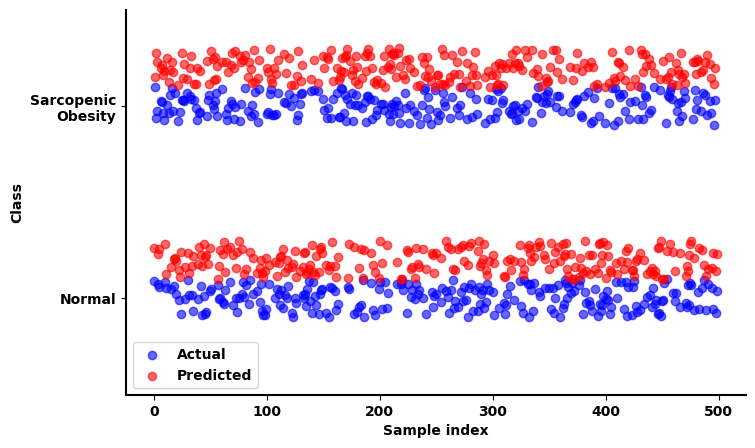

Test accuracy: 0.93


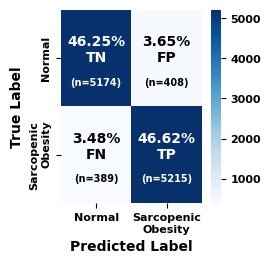

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc

# 저장된 최적의 모델 불러오기
model = load_model(best_model_path)

# 테스트 데이터셋에 대한 예측 수행
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# 예측값과 실제값 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values', alpha=0.6)
plt.scatter(range(len(predicted_classes)), predicted_classes, color='red', label='Predicted values', alpha=0.6)
plt.title('Actual vs. Predicted values')
plt.xlabel('Sample index')
plt.ylabel('Classification')
plt.legend()
plt.show()


# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
ax = plt.gca()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='blue')  # 수정된 부분
plt.plot([0, 1], [0, 1], color='lightcoral', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=9)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=9)
#plt.title(f'Receiver Operating Characteristic (Fold {fold})')
plt.legend(loc="lower right", prop={'weight': 'bold', 'size': 8})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
    
# Set x-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
    label.set_color('black')
plt.tight_layout(pad=5.0)
plt.show()


# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Calculate the Area Under the Curve (AUC) for the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(5, 5))
ax = plt.gca()  # 현재 축을 가져옴
ax.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
ax.set_xlabel('Recall', fontweight='bold', fontsize=9)
ax.set_ylabel('Precision', fontweight='bold', fontsize=9)
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.legend(loc="lower right", prop={'weight': 'bold', 'size': 8})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

    
# Set x-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
    label.set_color('black')

plt.tight_layout(pad=5.0)
plt.show()


####Actual vs Predicted values 
# Ensure the arrays are flat and convert them to integer type
y_test_flat = np.ravel(y_test).astype(int)
predicted_classes_flat = np.ravel(predicted_classes).astype(int)

# Combine the arrays and sample 1000 indices (or the total number if less than 1000)
total_indices = np.arange(len(y_test_flat))
if len(total_indices) > 500:
    sampled_indices = np.random.choice(total_indices, 500, replace=False)
else:
    sampled_indices = total_indices

# Extract the sampled actual and predicted values
sampled_actual = y_test_flat[sampled_indices]
sampled_predicted = predicted_classes_flat[sampled_indices]

# Create scatter plot data
scatter_x = np.arange(len(sampled_indices))  # Index for x-axis
scatter_y_actual = sampled_actual + np.random.uniform(-0.1, 0.1, len(sampled_indices))  # Add jitter
scatter_y_predicted = sampled_predicted + np.random.uniform(0.1, 0.3, len(sampled_indices))  # Add jitter

# Define custom labels for the classes
class_labels = ['Normal', 'Sarcopenic Obesity']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(scatter_x, scatter_y_actual, color='blue', alpha=0.6, label='Actual')
ax.scatter(scatter_x, scatter_y_predicted, color='red', alpha=0.6, label='Predicted')

# Customize the plot
ax.set_ylabel('Class', fontweight='bold')
ax.set_xlabel('Sample index', fontweight='bold')
#ax.set_title('Sampled Actual vs. Predicted Class Distribution')
ax.set_ylim(-0.5, 1.5)  # Assuming binary classification
ax.set_yticks([0, 1])
ax.set_yticks(range(len(class_labels)))
ax.set_yticklabels(['Normal', 'Sarcopenic\nObesity'], fontweight='bold')
ax.legend(loc='best', prop={'weight': 'bold', 'size': 10})
plt.grid(False)

# Set the y-axis to the left
ax.yaxis.tick_left()

# 축 선의 굵기 조정
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
plt.show()



# 정확도 출력
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Test accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
total = np.sum(cm)
cm_percentage = cm / total * 100
group_names = ['TN', 'FP', 'FN', 'TP']
# Custom annotations
group_percentages = ["{0:.2f}%".format(value) for value in cm_percentage.flatten()]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
# Function to choose text color based on background color
def get_text_color(value, threshold=40):  # Adjust the threshold as needed
    return "black" if value <= threshold else "white"

plt.figure(figsize=(3, 3))
ax = sns.heatmap(cm, annot=False, fmt="d", cmap='Blues',
           xticklabels=['Normal', 'Sarcopenic\nObesity'],
           yticklabels=['Normal', 'Sarcopenic\nObesity'],)

# Custom annotations with different font sizes and colors
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm_percentage[i, j]
        text_color = get_text_color(value)
        plt.text(j + 0.5, i + 0.5,
            f"{group_percentages[i * 2 + j]}\n{group_names[i * 2 + j]}\n",
                 ha="center", va="center", fontweight="bold", color=text_color)
        plt.text(j + 0.5, i + 0.5 + 0.25,
            f"(n={group_counts[i * 2 + j]})",
                 ha="center", va="center", fontsize=7, fontweight="bold", color=text_color)

# Retrieve the color bar
cbar = ax.collections[0].colorbar
# Set the color bar labels to be bold
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Adjusting label settings
plt.xlabel('Predicted Label', fontweight='bold', fontsize='10')
plt.ylabel('True Label', fontweight='bold', fontsize='10')
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', fontsize='8')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize='8')
plt.tight_layout(pad=2)
plt.show()


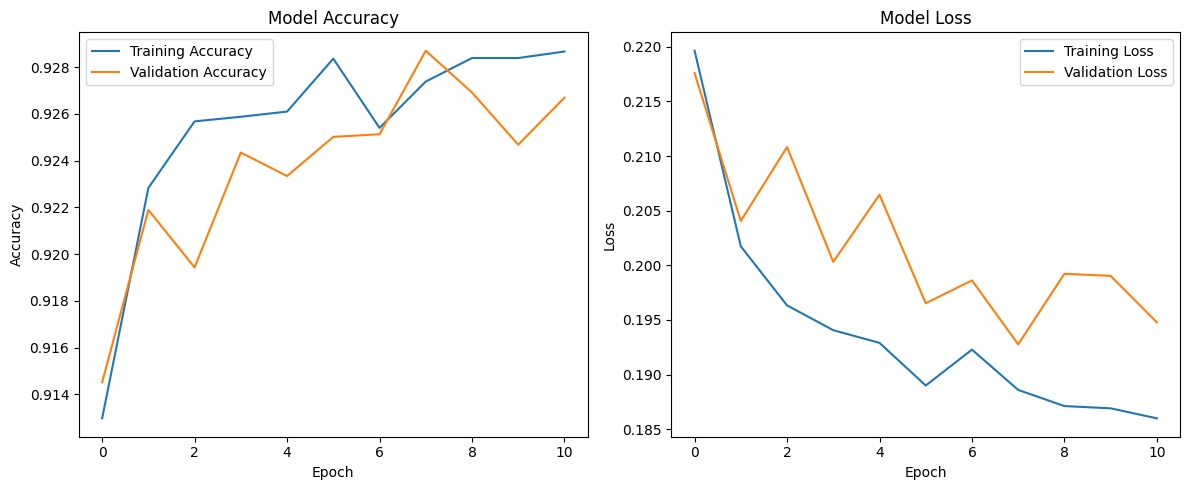

In [13]:
# 훈련 과정 시각화
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


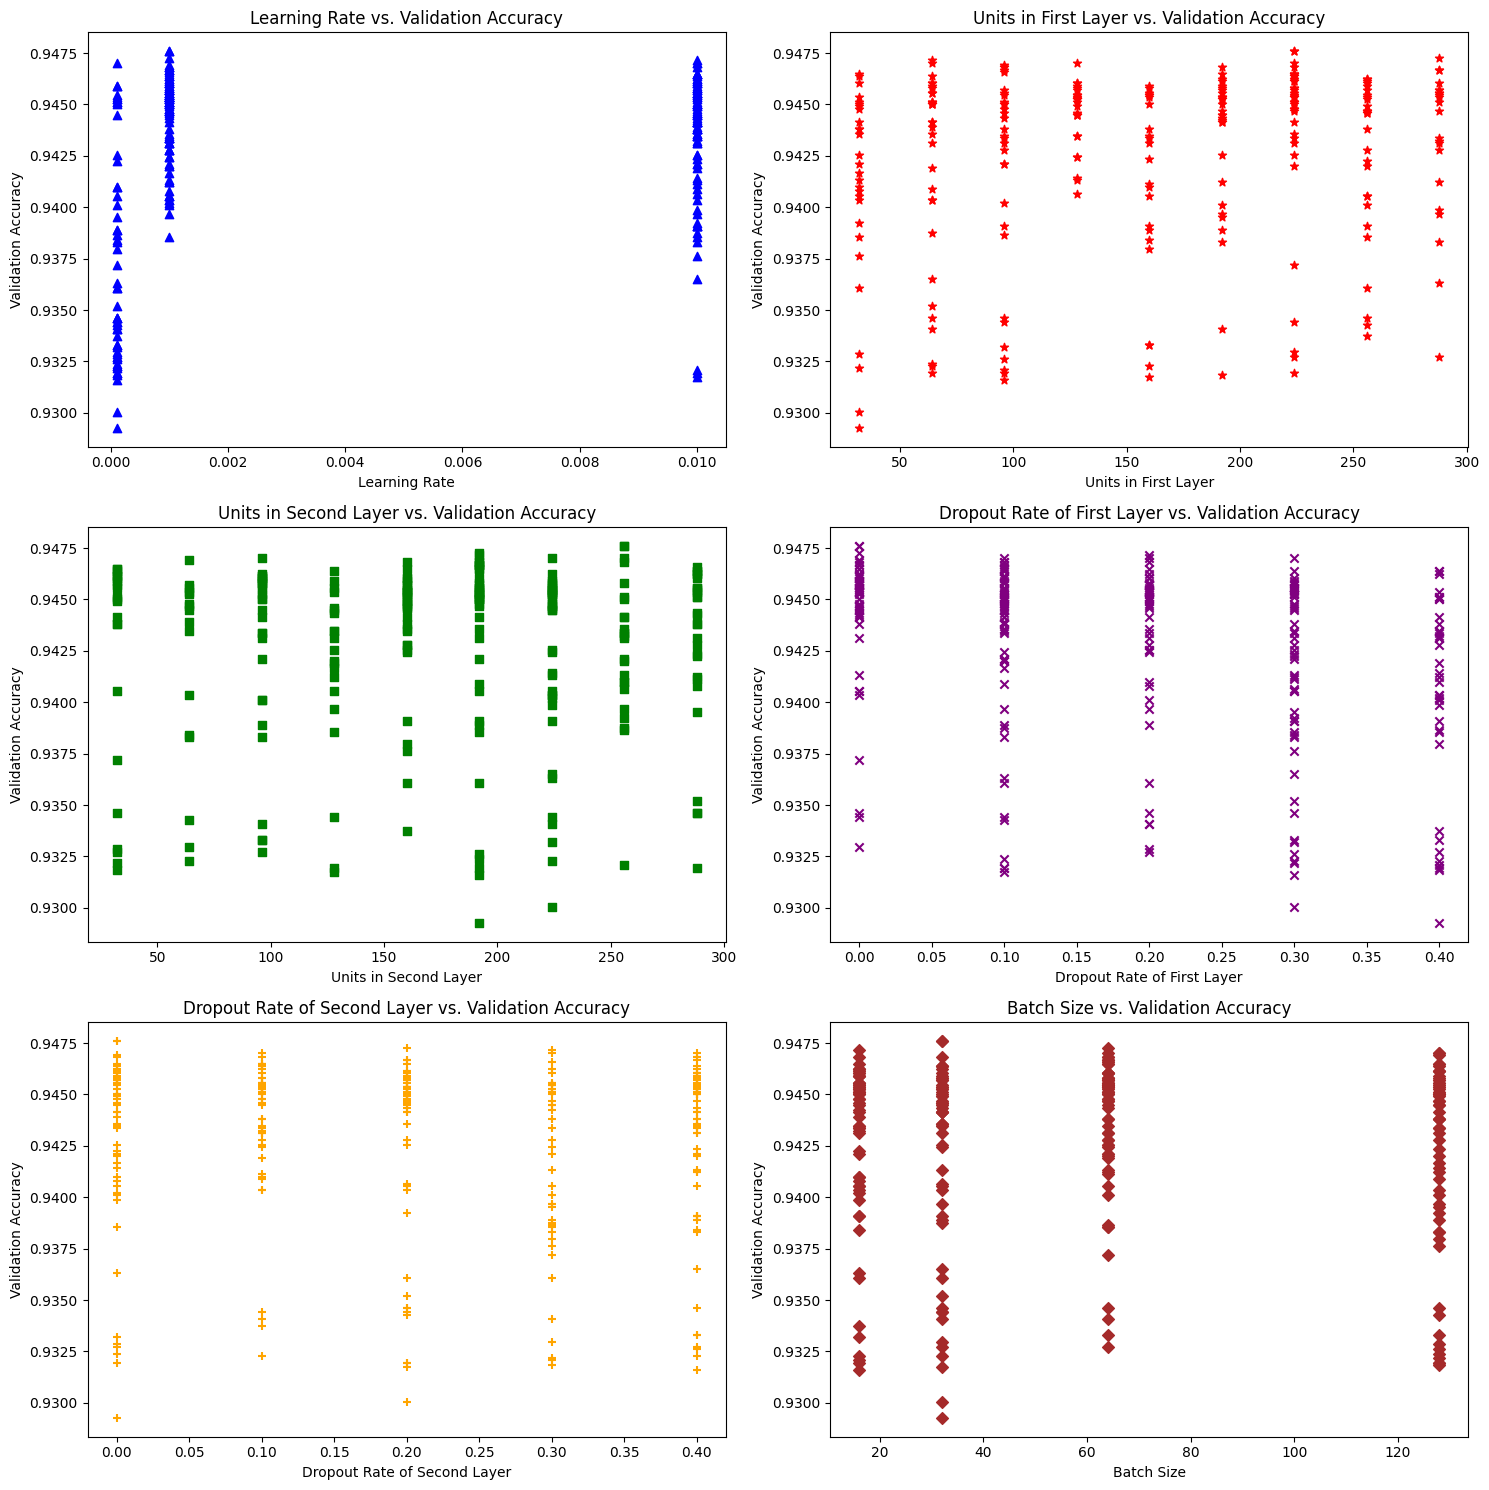

In [9]:
import matplotlib.pyplot as plt

# 하이퍼파라미터 및 성능 메트릭을 저장할 리스트 초기화
learning_rates = []
units_0 = []
units_1 = []
dropout_0 = []
dropout_1 = []
val_accuracies = []
batch_sizes = []

# 모든 완료된 시도에서 하이퍼파라미터와 검증 정확도를 추출
for trial in new_tuner.oracle.trials.values():
    if trial.status == "COMPLETED":
        # 각 시도에서 하이퍼파라미터 값과 결과 메트릭 저장
        hp=trial.hyperparameters
        batch_sizes.append(hp.get('batch_size'))
        val_accuracies.append(trial.score)
        learning_rates.append(trial.hyperparameters.get('learning_rate'))
        units_0.append(trial.hyperparameters.get('units_0'))
        units_1.append(trial.hyperparameters.get('units_1'))
        dropout_0.append(trial.hyperparameters.get('dropout_0'))
        dropout_1.append(trial.hyperparameters.get('dropout_1'))
        
# 데이터 시각화
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 서브플롯

# 학습률과 검증 정확도 ('^' 마커 사용)
axs[0, 0].scatter(learning_rates, val_accuracies, color='blue', marker='^')
axs[0, 0].set_title('Learning Rate vs. Validation Accuracy')
axs[0, 0].set_xlabel('Learning Rate')
axs[0, 0].set_ylabel('Validation Accuracy')

# 첫 번째 레이어 유닛 수와 검증 정확도 ('*' 마커 사용)
axs[0, 1].scatter(units_0, val_accuracies, color='red', marker='*')
axs[0, 1].set_title('Units in First Layer vs. Validation Accuracy')
axs[0, 1].set_xlabel('Units in First Layer')
axs[0, 1].set_ylabel('Validation Accuracy')

# 두 번째 레이어 유닛 수와 검증 정확도 ('s' 마커 사용)
axs[1, 0].scatter(units_1, val_accuracies, color='green', marker='s')
axs[1, 0].set_title('Units in Second Layer vs. Validation Accuracy')
axs[1, 0].set_xlabel('Units in Second Layer')
axs[1, 0].set_ylabel('Validation Accuracy')

# 첫 번째 레이어 드롭아웃 비율과 검증 정확도 ('x' 마커 사용)
axs[1, 1].scatter(dropout_0, val_accuracies, color='purple', marker='x')
axs[1, 1].set_title('Dropout Rate of First Layer vs. Validation Accuracy')
axs[1, 1].set_xlabel('Dropout Rate of First Layer')
axs[1, 1].set_ylabel('Validation Accuracy')

# 두 번째 레이어 드롭아웃 비율과 검증 정확도 ('+' 마커 사용)
axs[2, 0].scatter(dropout_1, val_accuracies, color='orange', marker='+')
axs[2, 0].set_title('Dropout Rate of Second Layer vs. Validation Accuracy')
axs[2, 0].set_xlabel('Dropout Rate of Second Layer')
axs[2, 0].set_ylabel('Validation Accuracy')

# 배치 사이즈와 검증 정확도 ('D' 마커 사용)
axs[2, 1].scatter(batch_sizes, val_accuracies, color='brown', marker='D')
axs[2, 1].set_title('Batch Size vs. Validation Accuracy')
axs[2, 1].set_xlabel('Batch Size')
axs[2, 1].set_ylabel('Validation Accuracy')

plt.tight_layout()
plt.show()



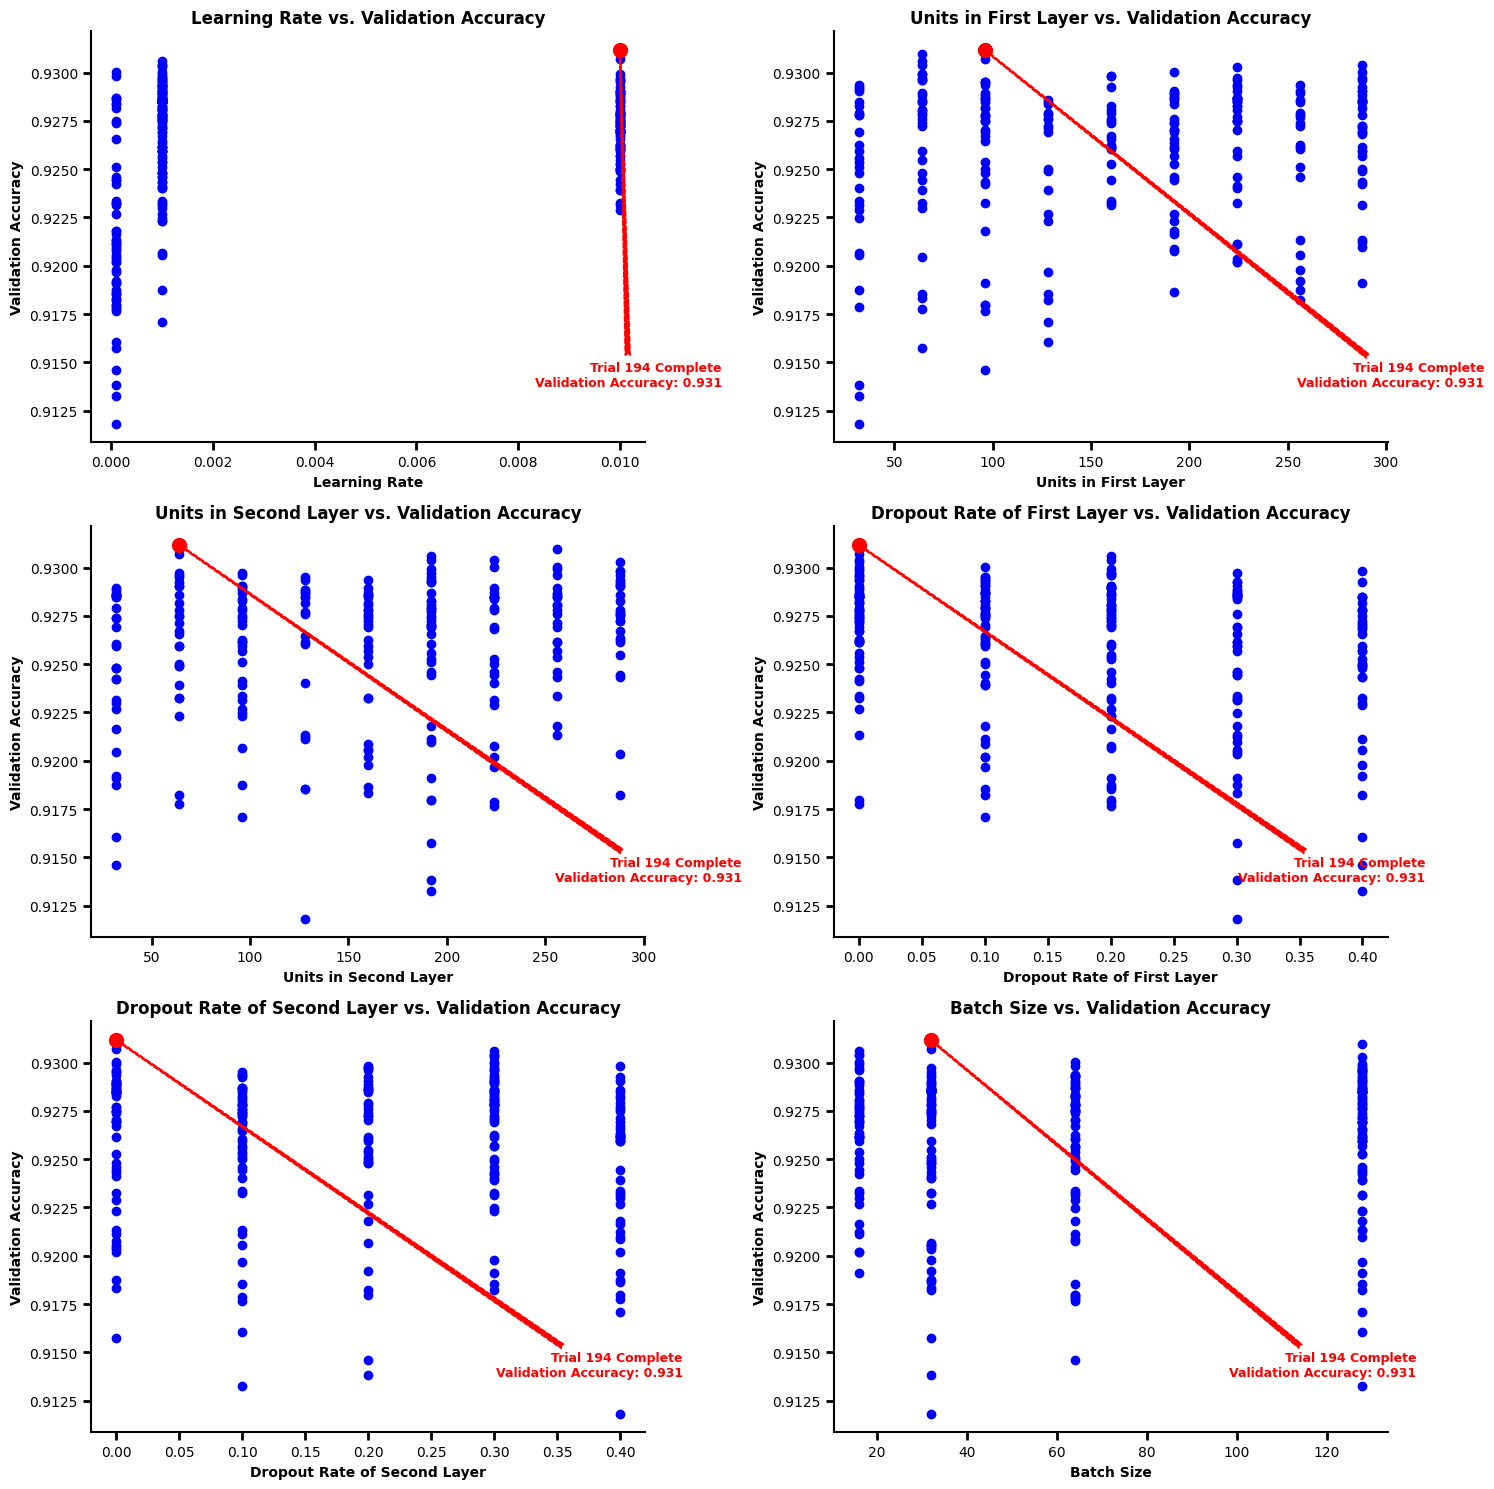

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 하이퍼파라미터 및 성능 메트릭을 저장할 리스트 초기화
learning_rates = []
units_0 = []
units_1 = []
dropout_0 = []
dropout_1 = []
val_accuracies = []
batch_sizes = []

# 모든 완료된 시도에서 하이퍼파라미터와 검증 정확도를 추출
for trial in new_tuner.oracle.trials.values():
    if trial.status == "COMPLETED":
        # 각 시도에서 하이퍼파라미터 값과 결과 메트릭 저장
        hp=trial.hyperparameters
        batch_sizes.append(hp.get('batch_size'))
        val_accuracies.append(trial.score)
        learning_rates.append(trial.hyperparameters.get('learning_rate'))
        units_0.append(trial.hyperparameters.get('units_0'))
        units_1.append(trial.hyperparameters.get('units_1'))
        dropout_0.append(trial.hyperparameters.get('dropout_0'))
        dropout_1.append(trial.hyperparameters.get('dropout_1'))

# 예를 들어, learning_rates에 대한 최적 값 찾기
best_index_lr = np.argmax(val_accuracies)
best_lr = learning_rates[best_index_lr]
best_val_acc_lr = val_accuracies[best_index_lr]

# 이제 위의 코드를 모든 하이퍼파라미터에 대해 반복합니다
# units_0에 대한 최적 값 찾기
best_index_u0 = np.argmax(val_accuracies)
best_u0 = units_0[best_index_u0]
best_val_acc_u0 = val_accuracies[best_index_u0]

# units_1에 대한 최적 값 찾기
best_index_u1 = np.argmax(val_accuracies)
best_u1 = units_1[best_index_u1]
best_val_acc_u1 = val_accuracies[best_index_u1]

# dropout_0에 대한 최적 값 찾기
best_index_d0 = np.argmax(val_accuracies)
best_d0 = dropout_0[best_index_d0]
best_val_acc_d0 = val_accuracies[best_index_d0]

# dropout_1에 대한 최적 값 찾기
best_index_d1 = np.argmax(val_accuracies)
best_d1 = dropout_1[best_index_d1]
best_val_acc_d1 = val_accuracies[best_index_d1]

# batch_sizes에 대한 최적 값 찾기
best_index_bs = np.argmax(val_accuracies)
best_bs = batch_sizes[best_index_bs]
best_val_acc_bs = val_accuracies[best_index_bs]


# Data visualization with modifications
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 subplots

def style_subplot(ax, x_data, y_data, title, x_label, y_label, marker, best_index, best_x, best_y):
    ax.scatter(x_data, y_data, color='blue', marker=marker)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_ylabel(y_label, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, width=2, length=6)
    ax.tick_params(axis='y', labelsize=10, width=2, length=6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)

    # Plot the best point as a larger, red arrow marker
    ax.scatter(best_x, best_y, color='red', marker='o', s=100, zorder=5)

    # Get the last x tick value for the position of annotation
    last_x_pos = ax.get_xticks()[-1]
    y_range = ax.get_ylim()
    y_pos_for_annotation = y_range[0] + (y_range[1] - y_range[0]) * 0.10  # y축 범위의 10% 위치
    
    # Adjust vertical position for annotation just above the graph
    vertical_offset = (y_pos_for_annotation - ax.get_ylim()[0]) * 0.30  # 2% of the y-axis range

    # Annotate the best point with the accuracy value, positioned above the last x tick
    ax.annotate(f'Trial {best_index} Complete\nValidation Accuracy: {best_y:.3f}', 
                xy=(best_x, best_y), 
                xytext=(last_x_pos, y_pos_for_annotation + vertical_offset), 
                textcoords='data', 
                #arrowprops=dict(arrowstyle='fancy', color='lightblue', linewidth=1, ls='-'),
                #arrowprops=dict(arrowstyle='simple', color='lightblue', linewidth=1, ls='-'),
                arrowprops=dict(arrowstyle='fancy', color='red', linewidth=1, ls='--'),
                fontsize=9, fontweight='bold', 
                color='red',
                horizontalalignment='right', 
                verticalalignment='bottom')

# Apply custom styling to each subplot with annotations adjusted for each
style_subplot(axs[0, 0], learning_rates, val_accuracies, 'Learning Rate vs. Validation Accuracy', 'Learning Rate', 'Validation Accuracy', 'o', best_index_lr, best_lr, best_val_acc_lr)
style_subplot(axs[0, 1], units_0, val_accuracies, 'Units in First Layer vs. Validation Accuracy', 'Units in First Layer', 'Validation Accuracy', 'o', best_index_u0, best_u0, best_val_acc_u0)
style_subplot(axs[1, 0], units_1, val_accuracies, 'Units in Second Layer vs. Validation Accuracy', 'Units in Second Layer', 'Validation Accuracy', 'o', best_index_u1, best_u1, best_val_acc_u1)
style_subplot(axs[1, 1], dropout_0, val_accuracies, 'Dropout Rate of First Layer vs. Validation Accuracy', 'Dropout Rate of First Layer', 'Validation Accuracy', 'o', best_index_d0, best_d0, best_val_acc_d0)
style_subplot(axs[2, 0], dropout_1, val_accuracies, 'Dropout Rate of Second Layer vs. Validation Accuracy', 'Dropout Rate of Second Layer', 'Validation Accuracy', 'o', best_index_d1, best_d1, best_val_acc_d1)
style_subplot(axs[2, 1], batch_sizes, val_accuracies, 'Batch Size vs. Validation Accuracy', 'Batch Size', 'Validation Accuracy', 'o', best_index_bs, best_bs, best_val_acc_bs)

plt.tight_layout()
plt.show()


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the best hyperparameters from the tuning process
best_learning_rate = 0.001  # Example value, to be replaced with your best value
best_units_first_layer = 224  # Example value, to be replaced with your best value
best_units_second_layer = 256  # Example value, to be replaced with your best value
best_dropout_first_layer = 0.0  # Example value, to be replaced with your best value
best_dropout_second_layer = 0.0  # Example value, to be replaced with your best value
best_batch_size = 32  # Common default value
input_shape = (10,)  # Example input shape, replace with the actual shape of your data
num_classes = 2  # Example number of output classes, replace with the actual number of your classes

# Define the model
model = Sequential()

# Add layers to the model
model.add(Dense(best_units_first_layer, activation='relu', input_shape=input_shape))
model.add(Dropout(best_dropout_first_layer))
model.add(Dense(best_units_second_layer, activation='relu'))
model.add(Dropout(best_dropout_second_layer))
model.add(Dense(num_classes, activation='softmax'))  # Assuming a classification problem

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer with the best learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 224)               2464      
                                                                 
 dropout_4 (Dropout)         (None, 224)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               57600     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 514       
                                                                 
Total params: 60578 (236.63 KB)
Trainable params: 60578 (236.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


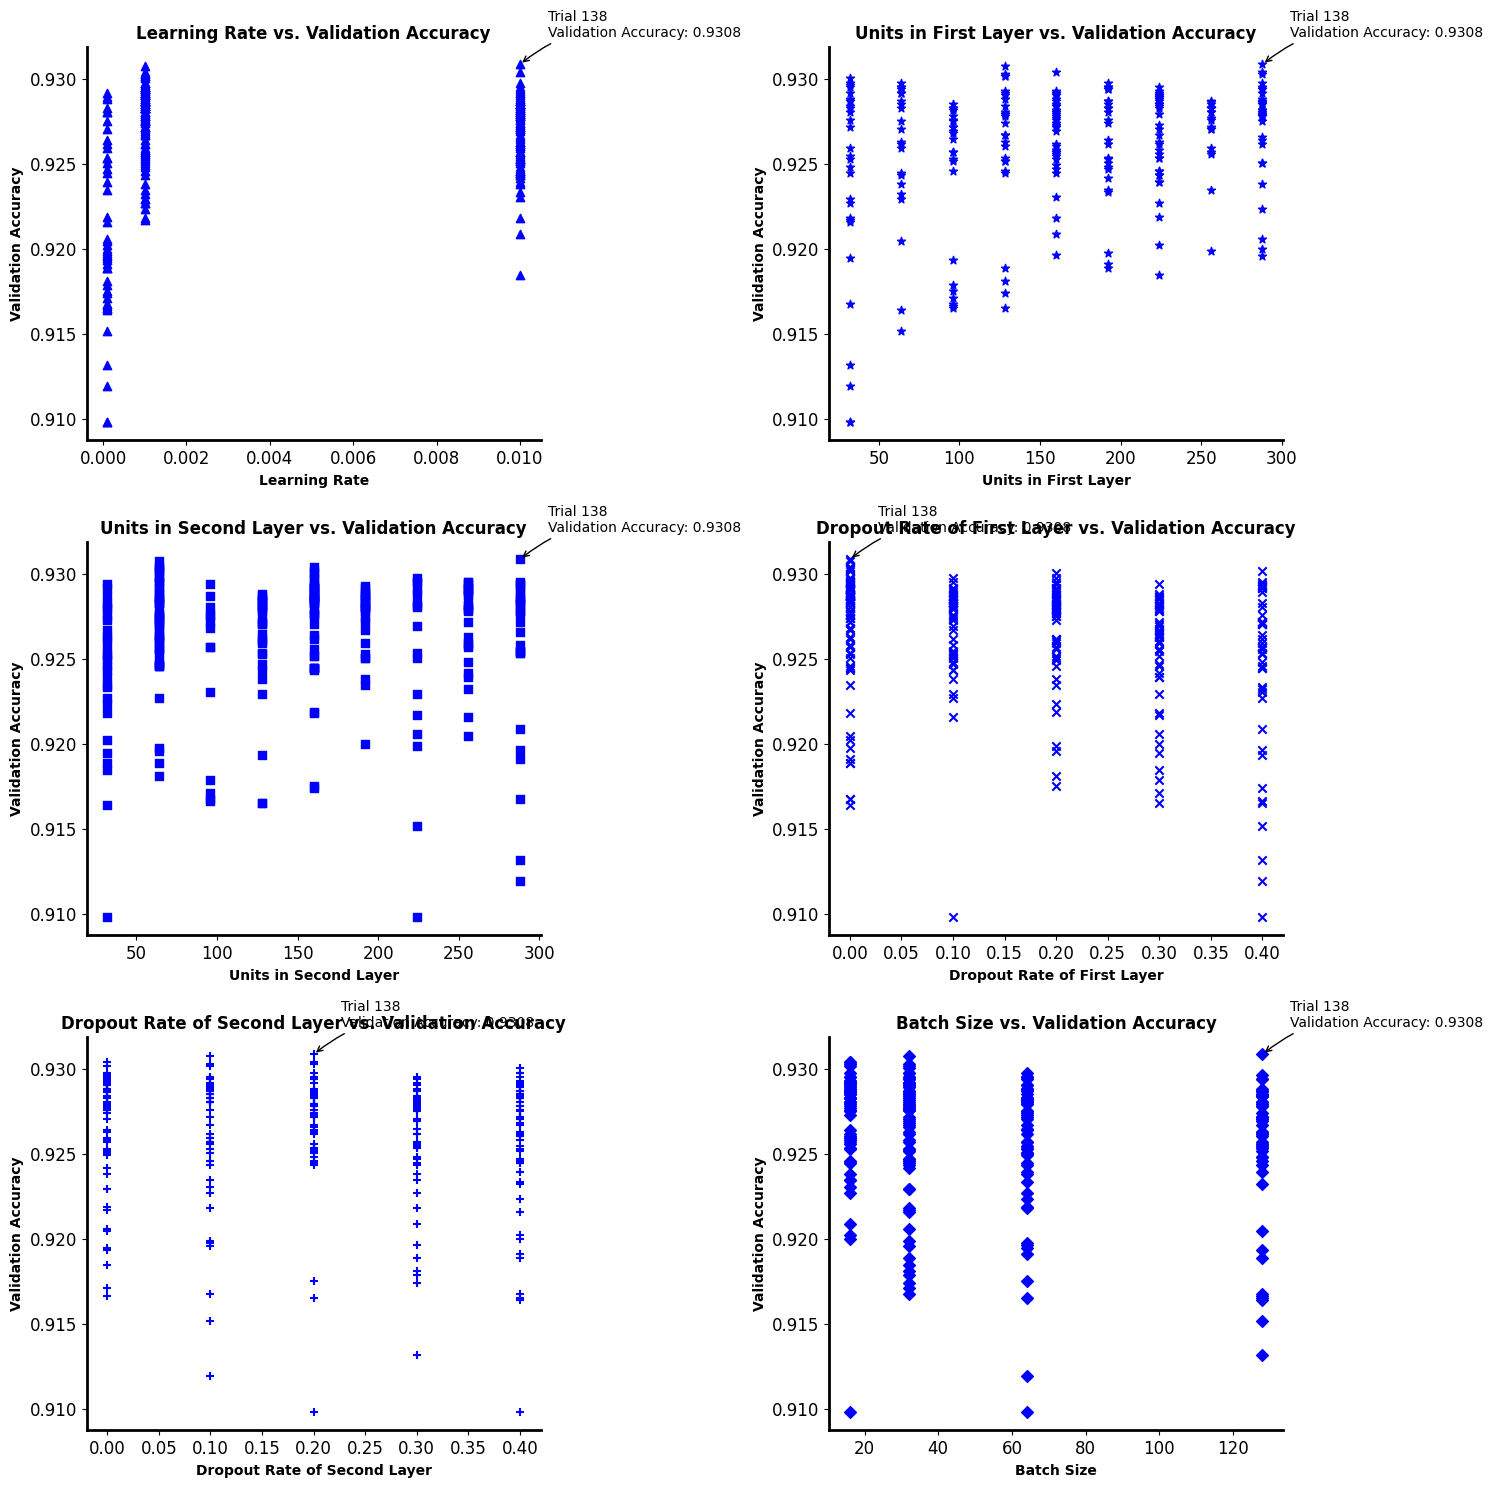

In [10]:
# 하이퍼파라미터 및 성능 메트릭을 저장할 리스트 초기화
learning_rates = []
units_0 = []
units_1 = []
dropout_0 = []
dropout_1 = []
val_accuracies = []
batch_sizes = []

# 모든 완료된 시도에서 하이퍼파라미터와 검증 정확도를 추출
for trial in new_tuner.oracle.trials.values():
    if trial.status == "COMPLETED":
        # 각 시도에서 하이퍼파라미터 값과 결과 메트릭 저장
        hp=trial.hyperparameters
        batch_sizes.append(hp.get('batch_size'))
        val_accuracies.append(trial.score)
        learning_rates.append(trial.hyperparameters.get('learning_rate'))
        units_0.append(trial.hyperparameters.get('units_0'))
        units_1.append(trial.hyperparameters.get('units_1'))
        dropout_0.append(trial.hyperparameters.get('dropout_0'))
        dropout_1.append(trial.hyperparameters.get('dropout_1'))

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 서브플롯 스타일링 함수 정의
def style_subplot(ax, x_data, y_data, title, x_label, y_label, marker):
    ax.scatter(x_data, y_data, color='blue', marker=marker)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_ylabel(y_label, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    best_index = np.argmax(y_data)
    best_x = x_data[best_index]
    best_y = y_data[best_index]
    ax.annotate(f'Trial {best_index}\nValidation Accuracy: {best_y:.4f}', 
                xy=(best_x, best_y), xytext=(20, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# 각 서브플롯에 스타일 적용
style_subplot(axs[0, 0], learning_rates, val_accuracies, 'Learning Rate vs. Validation Accuracy', 'Learning Rate', 'Validation Accuracy', '^')
style_subplot(axs[0, 1], units_0, val_accuracies, 'Units in First Layer vs. Validation Accuracy', 'Units in First Layer', 'Validation Accuracy', '*')
style_subplot(axs[1, 0], units_1, val_accuracies, 'Units in Second Layer vs. Validation Accuracy', 'Units in Second Layer', 'Validation Accuracy', 's')
style_subplot(axs[1, 1], dropout_0, val_accuracies, 'Dropout Rate of First Layer vs. Validation Accuracy', 'Dropout Rate of First Layer', 'Validation Accuracy', 'x')
style_subplot(axs[2, 0], dropout_1, val_accuracies, 'Dropout Rate of Second Layer vs. Validation Accuracy', 'Dropout Rate of Second Layer', 'Validation Accuracy', '+')
style_subplot(axs[2, 1], batch_sizes, val_accuracies, 'Batch Size vs. Validation Accuracy', 'Batch Size', 'Validation Accuracy', 'D')

plt.tight_layout()
plt.show()


In [26]:
import scikeras
print(scikeras.__version__)

0.12.0


In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터 로드 및 처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG', '8walktestsec']]
y = data['group_numberic']

# Random Under Sampling 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 모델 생성 함수 정의
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# KerasClassifier 래퍼로 모델 래핑
model = KerasClassifier(build_fn=create_model, verbose=0)

# 그리드 탐색 파라미터 설정
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# GridSearchCV 객체 생성
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# 최적 결과 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\Jun-Hyun Bae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.948102 using {'batch_size': 10, 'epochs': 100}
0.937888 (0.003537) with: {'batch_size': 10, 'epochs': 10}
0.946784 (0.000685) with: {'batch_size': 10, 'epochs': 50}
0.948102 (0.000438) with: {'batch_size': 10, 'epochs': 100}
0.939766 (0.003102) with: {'batch_size': 20, 'epochs': 10}
0.947454 (0.000838) with: {'batch_size': 20, 'epochs': 50}
0.942895 (0.005348) with: {'batch_size': 20, 'epochs': 100}
0.936525 (0.002821) with: {'batch_size': 40, 'epochs': 10}
0.946404 (0.000729) with: {'batch_size': 40, 'epochs': 50}
0.947365 (0.000753) with: {'batch_size': 40, 'epochs': 100}
0.936793 (0.002535) with: {'batch_size': 60, 'epochs': 10}
0.946516 (0.001112) with: {'batch_size': 60, 'epochs': 50}
0.947924 (0.001154) with: {'batch_size': 60, 'epochs': 100}
0.934983 (0.002150) with: {'batch_size': 80, 'epochs': 10}
0.941107 (0.004325) with: {'batch_size': 80, 'epochs': 50}
0.947722 (0.000526) with: {'batch_size': 80, 'epochs': 100}
0.934938 (0.002310) with: {'batch_size': 100, 'epochs':

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.under_sampling import RandomUnderSampler

# 데이터 로드 및 처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG', '8walktestsec']]
y = data['group_numberic']

# Random Under Sampling 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 모델 생성 함수 정의, dropout_rate와 learning_rate 매개변수 추가
def create_model(dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# KerasClassifier 래퍼로 모델 래핑
model = KerasClassifier(model=create_model, verbose=0)

# 그리드 탐색 파라미터 설정, dropout_rate와 learning_rate 포함
param_grid = {
    'model__dropout_rate': [0.0, 0.1, 0.2, 0.3],
    'model__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'batch_size': [10],
    'epochs': [100]
}

# GridSearchCV 객체 생성
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# 최적 결과 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))






Best: 0.946560 using {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.01}
0.944146 (0.004334) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.0, 'model__learning_rate': 0.001}
0.946136 (0.001780) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.0, 'model__learning_rate': 0.01}
0.935832 (0.008320) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.0, 'model__learning_rate': 0.05}
0.938313 (0.003938) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.0, 'model__learning_rate': 0.1}
0.946136 (0.000548) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.001}
0.946560 (0.000686) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.01}
0.936413 (0.005972) with: {'batch_size': 10, 'epochs': 100, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.05}
0.922645 (0.011262) with: {'batch_size': 10, 'epochs': 10

In [8]:
df.columns

Index(['Age', 'Height', 'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip',
       'NormalGrip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'relativegrip', 'Height_m', 'gender_numeric', 'ASM',
       'ASM_by_Weight', 'ASM_by_Weight_perc', 'group', 'group_numberic'],
      dtype='object')

Epoch 1/200


1103/1119 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9125
Epoch 1: val_loss improved from inf to 0.22180, saving model to models\undersampling_kfold_1_2024-03-25_21-51-39.keras
1119/1119 [==============================] - 2s 989us/step - loss: 0.2222 - accuracy: 0.9125 - val_loss: 0.2218 - val_accuracy: 0.9254
Epoch 2/200
1044/1119 [==========================>...] - ETA: 0s - loss: 0.2041 - accuracy: 0.9214
Epoch 2: val_loss improved from 0.22180 to 0.20500, saving model to models\undersampling_kfold_1_2024-03-25_21-51-39.keras
1119/1119 [==============================] - 1s 786us/step - loss: 0.2043 - accuracy: 0.9215 - val_loss: 0.2050 - val_accuracy: 0.9205
Epoch 3/200
1061/1119 [===========================>..] - ETA: 0s - loss: 0.1995 - accuracy: 0.9235
Epoch 3: val_loss did not improve from 0.20500
1119/1119 [==============================] - 1s 810us/step - loss: 0.1994 - accuracy: 0.9237 - val_loss: 0.2055 - val_accuracy: 0.9252
Epoch 4

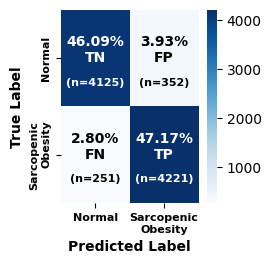

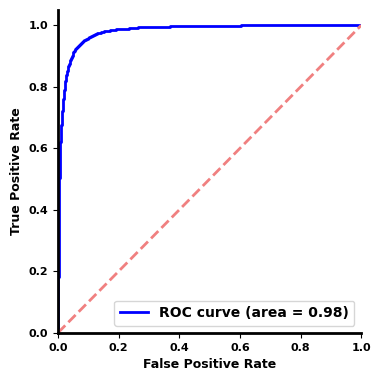

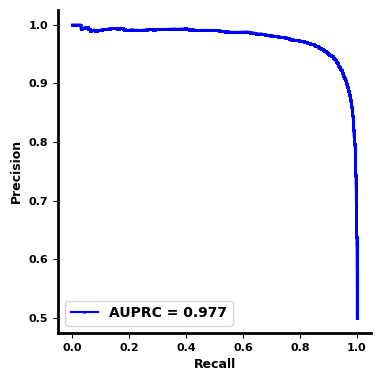

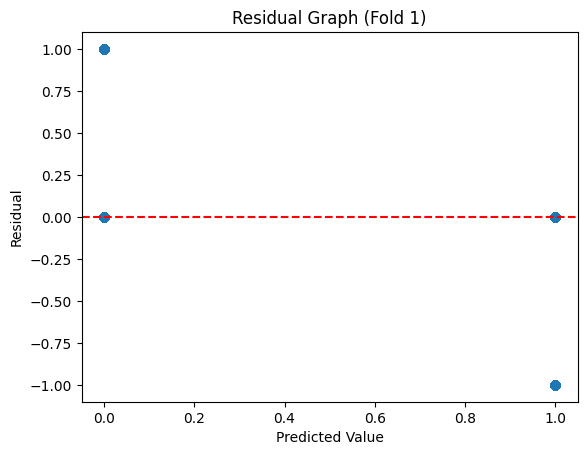

Epoch 1/200
1095/1119 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9122
Epoch 1: val_loss improved from inf to 0.23871, saving model to models\undersampling_kfold_2_2024-03-25_21-52-12.keras
1119/1119 [==============================] - 1s 957us/step - loss: 0.2259 - accuracy: 0.9125 - val_loss: 0.2387 - val_accuracy: 0.9090
Epoch 2/200
1087/1119 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9232
Epoch 2: val_loss improved from 0.23871 to 0.20255, saving model to models\undersampling_kfold_2_2024-03-25_21-52-12.keras
1119/1119 [==============================] - 1s 863us/step - loss: 0.2023 - accuracy: 0.9233 - val_loss: 0.2026 - val_accuracy: 0.9217
Epoch 3/200
1088/1119 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9248
Epoch 3: val_loss improved from 0.20255 to 0.18726, saving model to models\undersampling_kfold_2_2024-03-25_21-52-12.keras
1119/1119 [==============================] - 1s 859us/step - loss: 0

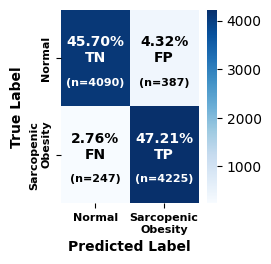

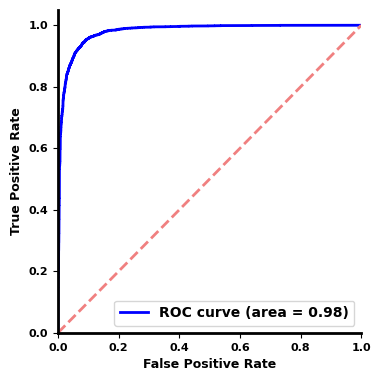

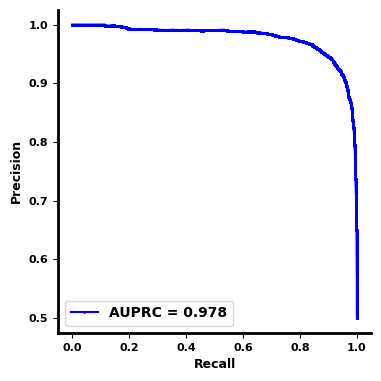

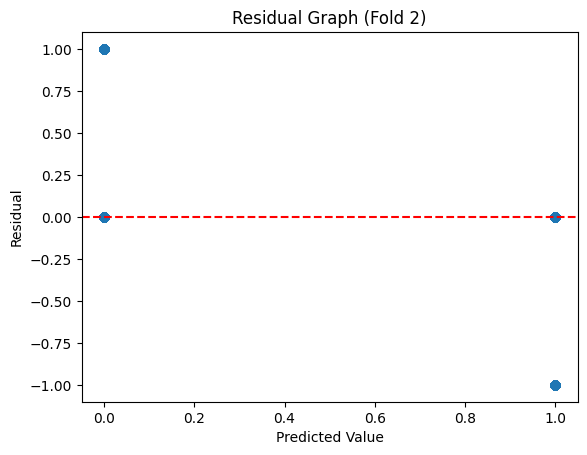

Epoch 1/200
1096/1119 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9110
Epoch 1: val_loss improved from inf to 0.20307, saving model to models\undersampling_kfold_3_2024-03-25_21-53-11.keras
1119/1119 [==============================] - 1s 866us/step - loss: 0.2228 - accuracy: 0.9115 - val_loss: 0.2031 - val_accuracy: 0.9238
Epoch 2/200
1106/1119 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9227
Epoch 2: val_loss improved from 0.20307 to 0.20056, saving model to models\undersampling_kfold_3_2024-03-25_21-53-11.keras
1119/1119 [==============================] - 1s 791us/step - loss: 0.1997 - accuracy: 0.9228 - val_loss: 0.2006 - val_accuracy: 0.9272
Epoch 3/200
1099/1119 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.9244
Epoch 3: val_loss did not improve from 0.20056
1119/1119 [==============================] - 1s 790us/step - loss: 0.1983 - accuracy: 0.9243 - val_loss: 0.2143 - val_accuracy: 0.9202
Epoch 4/2

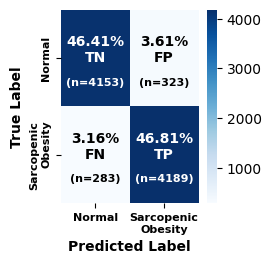

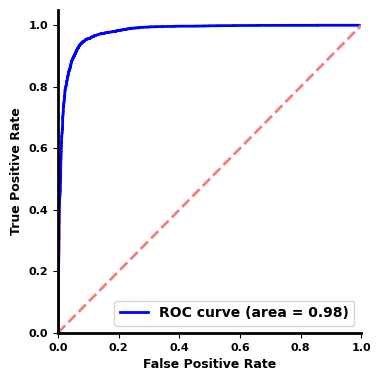

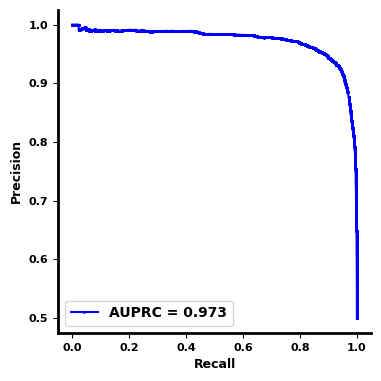

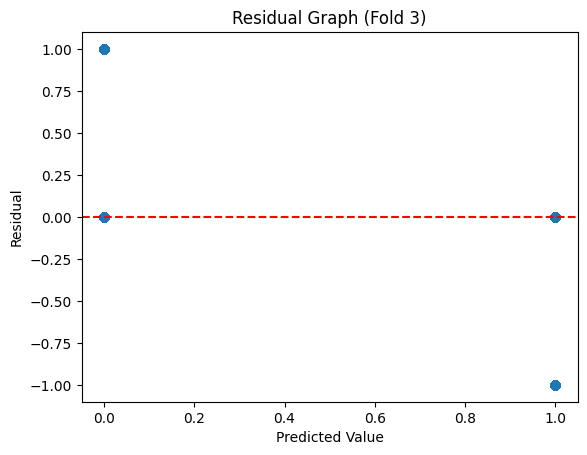

Epoch 1/200
1093/1119 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9151
Epoch 1: val_loss improved from inf to 0.19407, saving model to models\undersampling_kfold_4_2024-03-25_21-54-34.keras
1119/1119 [==============================] - 1s 874us/step - loss: 0.2212 - accuracy: 0.9152 - val_loss: 0.1941 - val_accuracy: 0.9251
Epoch 2/200
1101/1119 [============================>.] - ETA: 0s - loss: 0.2033 - accuracy: 0.9231
Epoch 2: val_loss improved from 0.19407 to 0.18919, saving model to models\undersampling_kfold_4_2024-03-25_21-54-34.keras
1119/1119 [==============================] - 1s 792us/step - loss: 0.2033 - accuracy: 0.9229 - val_loss: 0.1892 - val_accuracy: 0.9283
Epoch 3/200
1080/1119 [===========================>..] - ETA: 0s - loss: 0.2010 - accuracy: 0.9236
Epoch 3: val_loss did not improve from 0.18919
1119/1119 [==============================] - 1s 799us/step - loss: 0.2002 - accuracy: 0.9235 - val_loss: 0.2178 - val_accuracy: 0.9132
Epoch 4/2

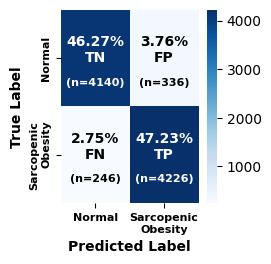

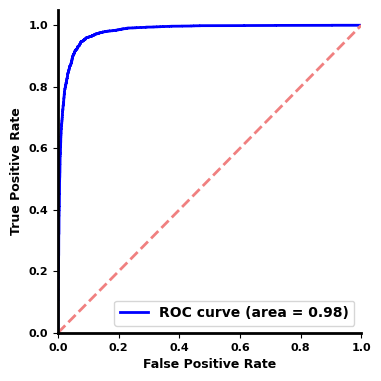

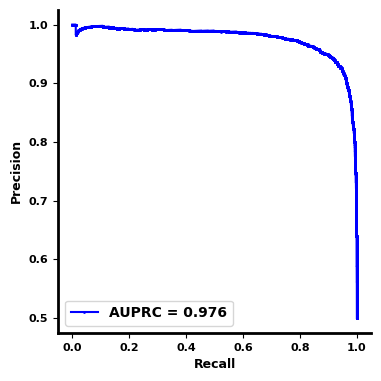

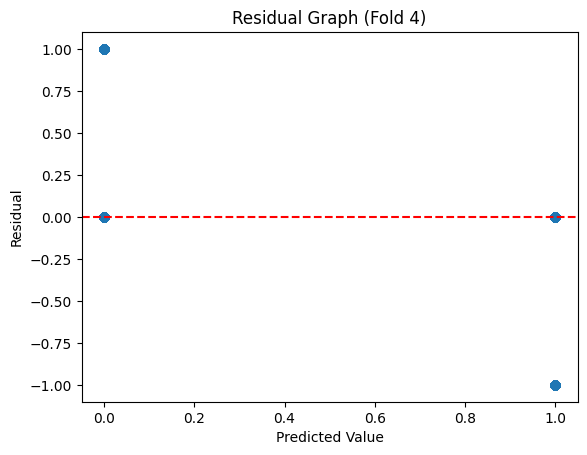

Epoch 1/200
1106/1119 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9125
Epoch 1: val_loss improved from inf to 0.22570, saving model to models\undersampling_kfold_5_2024-03-25_21-55-47.keras
1119/1119 [==============================] - 1s 864us/step - loss: 0.2246 - accuracy: 0.9125 - val_loss: 0.2257 - val_accuracy: 0.9087
Epoch 2/200
1069/1119 [===========================>..] - ETA: 0s - loss: 0.2049 - accuracy: 0.9215
Epoch 2: val_loss improved from 0.22570 to 0.19249, saving model to models\undersampling_kfold_5_2024-03-25_21-55-47.keras
1119/1119 [==============================] - 1s 809us/step - loss: 0.2046 - accuracy: 0.9216 - val_loss: 0.1925 - val_accuracy: 0.9252
Epoch 3/200
1078/1119 [===========================>..] - ETA: 0s - loss: 0.1984 - accuracy: 0.9238
Epoch 3: val_loss improved from 0.19249 to 0.18853, saving model to models\undersampling_kfold_5_2024-03-25_21-55-47.keras
1119/1119 [==============================] - 1s 804us/step - loss: 0

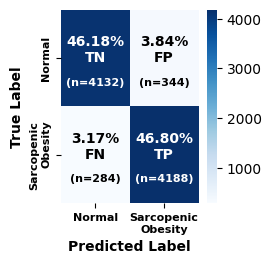

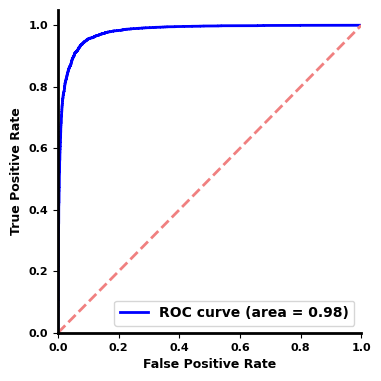

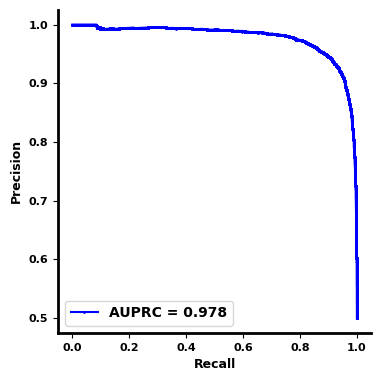

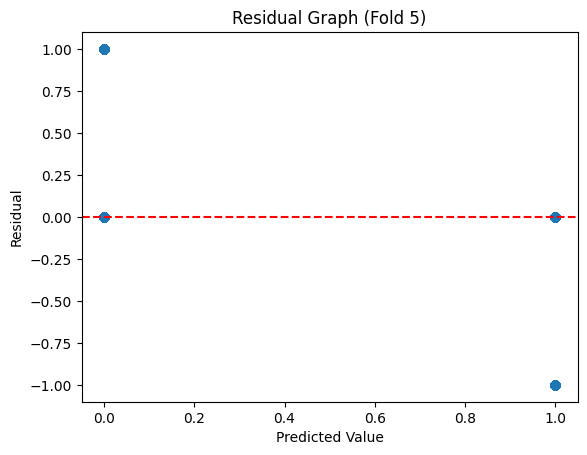

Average ROC-AUC: 0.9792
Average MAE: 0.1030
Average MSE: 0.0519
Average Accuracy: 0.9318
Average Precision: 0.9236
Average Recall: 0.9414
Average F1-score: 0.9324


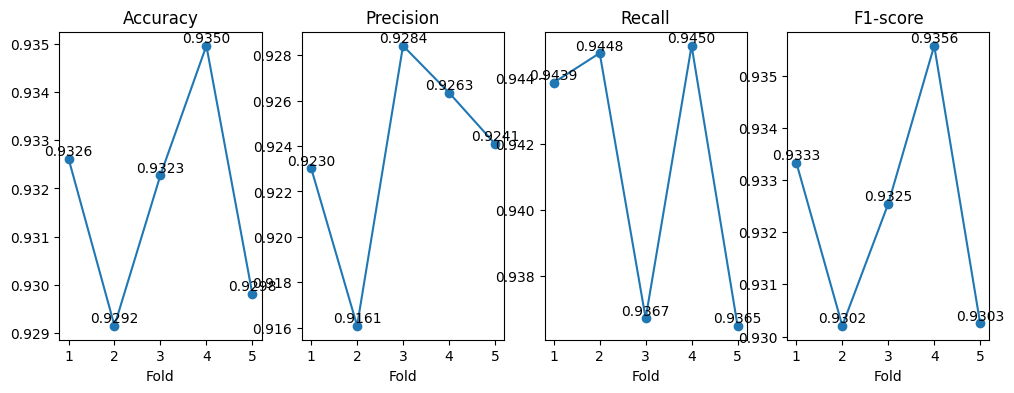

In [10]:
# Load data (replace with your own dataset)
data = df

# Set dependent and independent variables
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Data scaling
X_train_scaled = X_train
X_test_scaled = X_test

# 모델을 저장할 폴더 생성
model_save_dir = "models"
# 이미 디렉토리가 존재하면 오류를 발생시키지 않도록 수정
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# StratifiedKFold 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 변수 설정
accuracies = []
precisions = []
recalls = []
f1_scores = []

roc_auc_scores = []
mae_values = []
mse_values = []

# 각 fold별 훈련과정 시각화를 위한 리스트 생성
loss_per_fold = []
val_loss_per_fold = []
accuracy_per_fold = []
val_accuracy_per_fold = []

# Initialize variables for the best model
highest_roc_auc_score = 0
best_model_timestamp = ""

# K-fold Cross Validation 수행
for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train), start=1):
    X_train_fold, X_val_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # 모델 이름에 폴드 번호를 포함하여 생성
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    model_name = f"undersampling_kfold_{fold}_{current_time}.keras"
    model_path = os.path.join(model_save_dir, model_name)

    # 모델 구성
    model = Sequential()
    model.add(Dense(96, activation='relu', input_shape=(9,)))
    model.add(Dropout(0.0))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # 모델 컴파일
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

    # EarlyStopping과 ModelCheckpoint 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
    
    # 모델 학습
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=200, batch_size=32, callbacks=[early_stopping, model_checkpoint])

    # 저장된 모델 로드
    best_model = tf.keras.models.load_model(model_path)

    # 검증 세트에 대한 예측
    y_pred_val = best_model.predict(X_val_fold)
    y_pred_classes_val = (y_pred_val > 0.5).astype(int).flatten()

    # 검증 세트에 대한 예측 확률
    y_pred_val_probs = best_model.predict(X_val_fold).ravel()
    
    # 검증 세트에 대한 성능 지표 계산
    accuracy = accuracy_score(y_val_fold, y_pred_classes_val)
    precision = precision_score(y_val_fold, y_pred_classes_val)
    recall = recall_score(y_val_fold, y_pred_classes_val)
    f1 = f1_score(y_val_fold, y_pred_classes_val)

    # 성능 지표 저장
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    #confusion matrix 계산
    cm = confusion_matrix(y_val_fold, y_pred_classes_val)
    total = np.sum(cm)
    cm_percentage = cm / total * 100
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_percentages = ["{0:.2f}%".format(value) for value in cm_percentage.flatten()]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    # Function to choose text color based on background color
    def get_text_color(value, threshold=40):  # Adjust the threshold as needed
        return "black" if value <= threshold else "white"

    plt.figure(figsize=(3, 3))
    ax = sns.heatmap(cm, cmap='Blues',
                 xticklabels=['Normal', 'Sarcopenic\nObesity'],
                 yticklabels=['Normal', 'Sarcopenic\nObesity'],)

    # Custom annotations with different font sizes and colors
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = cm_percentage[i, j]
            text_color = get_text_color(value)
            plt.text(j + 0.5, i + 0.5,
                 f"{group_percentages[i * 2 + j]}\n{group_names[i * 2 + j]}\n",
                 ha="center", va="center", fontweight="bold", color=text_color)
            plt.text(j + 0.5, i + 0.5 + 0.25,
                 f"(n={group_counts[i * 2 + j]})",
                 ha="center", va="center", fontsize=8, fontweight="bold", color=text_color)

    # Create the confusion matrix plot
    plt.xlabel('Predicted Label', fontweight='bold',fontsize='10')
    plt.ylabel('True Label', fontweight='bold',fontsize='10')

    # Make the tick labels on both axes bold
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold',fontsize='8')
    ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold',fontsize='8')

    #plt.title('Confusion Matrix', fontdict={'fontsize': 5, 'fontweight': 'bold'})

    plt.tight_layout(pad=2)
    plt.show()
    
    # confusion matrix 출력
    #plt.figure(figsize=(5,5))
    #sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    #plt.xlabel('Predicted label')
    #plt.ylabel('True label')
    #plt.show()

    # ROC 곡선 및 AUC 계산
    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_val)
    roc_auc = auc(fpr, tpr)

    # ROC 곡선 그리기
    plt.figure(figsize=(5, 5))
    ax = plt.gca()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='lightcoral', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontweight='bold',fontsize=9)
    plt.ylabel('True Positive Rate', fontweight='bold',fontsize=9)
    #plt.title(f'Receiver Operating Characteristic (Fold {fold})')
    plt.legend(loc="lower right", prop={'weight': 'bold', 'size': 10})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    
    # Set x-axis tick labels to bold
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize('8')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize('8')
        label.set_color('black')
    plt.tight_layout(pad=5.0)
    plt.show()

    # Precision-Recall curve 계산
    #precision, recall, thresholds = precision_recall_curve(y_val_fold, y_pred_val)
    precision, recall, _ = precision_recall_curve(y_val_fold, y_pred_val_probs)
    # AUPRC 계산
    average_precision = average_precision_score(y_val_fold, y_pred_val_probs)

    # Precision-Recall curve 그리기
    plt.figure(figsize=(5, 5))
    ax = plt.gca()
    plt.plot(recall, precision, marker='.', markersize=2, color='blue', label=f'AUPRC = {average_precision:.3f}')
    plt.xlabel('Recall', fontweight='bold',fontsize=9)
    plt.ylabel('Precision', fontweight='bold',fontsize=9)
    #plt.title(f'Precision-Recall Curve for Fold {fold}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize('8')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize('8')
        label.set_color('black')
    plt.legend(loc="lower left", prop={'weight': 'bold', 'size': 10})
    plt.tight_layout(pad=5.0)
    plt.show()

    # Calculate residuals
    residuals = y_val_fold - y_pred_classes_val

    # Calculate ROC-AUC, MAE and MSE
    roc_auc = roc_auc_score(y_val_fold, y_pred_val)
    mae = mean_absolute_error(y_val_fold, y_pred_val)
    mse = mean_squared_error(y_val_fold, y_pred_val)

    # Save the scores
    roc_auc_scores.append(roc_auc)
    mae_values.append(mae)
    mse_values.append(mse)
    
    # Update best model timestamp if current ROC-AUC is higher
    if roc_auc > highest_roc_auc_score:
        highest_roc_auc_score = roc_auc
        best_model_timestamp = current_time

    # Create a residual plot
    plt.scatter(y_pred_classes_val, residuals)
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.title(f'Residual Graph (Fold {fold})')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    # 훈련 과정의 loss, val_loss, accuracy, val_accuracy를 리스트에 추가
    loss_per_fold.append(history.history['loss'])
    val_loss_per_fold.append(history.history['val_loss'])
    accuracy_per_fold.append(history.history['accuracy'])
    val_accuracy_per_fold.append(history.history['val_accuracy'])
    

# Print average ROC-AUC, MAE and MSE across folds
print(f"Average ROC-AUC: {np.mean(roc_auc_scores):.4f}")
print(f"Average MAE: {np.mean(mae_values):.4f}")
print(f"Average MSE: {np.mean(mse_values):.4f}")

# 평가 지표의 평균 계산
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

# Assuming skf (StratifiedKFold object) is defined

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1_score:.4f}")

# Extract the number of folds from the StratifiedKFold object
num_folds = skf.n_splits

# Draw performance indicator graph
plt.figure(figsize=(12, 4))

# Accuracy graph
plt.subplot(1, 4, 1)
plt.plot(range(1, num_folds + 1), accuracies, marker='o')
plt.title('Accuracy')
plt.xlabel('Fold')
plt.xticks(range(1, num_folds + 1))
for i, value in enumerate(accuracies):
    plt.text(i + 1, value, f"{value:.4f}", ha='center', va='bottom')

# Precision graph
plt.subplot(1, 4, 2)
plt.plot(range(1, num_folds + 1), precisions, marker='o')
plt.title('Precision')
plt.xlabel('Fold')
plt.xticks(range(1, num_folds + 1))
for i, value in enumerate(precisions):
    plt.text(i + 1, value, f"{value:.4f}", ha='center', va='bottom')

# Recall graph
plt.subplot(1, 4, 3)
plt.plot(range(1, num_folds + 1), recalls, marker='o')
plt.title('Recall')
plt.xlabel('Fold')
plt.xticks(range(1, num_folds + 1))
for i, value in enumerate(recalls):
    plt.text(i + 1, value, f"{value:.4f}", ha='center', va='bottom')

# F1-score graph
plt.subplot(1, 4, 4)
plt.plot(range(1, num_folds + 1), f1_scores, marker='o')
plt.title('F1-score')
plt.xlabel('Fold')
plt.xticks(range(1, num_folds + 1))
for i, value in enumerate(f1_scores):
    plt.text(i + 1, value, f"{value:.4f}", ha='center', va='bottom')

plt.show()

# Select final model
best_fold = np.argmax(roc_auc_scores)
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold+1}_{best_model_timestamp}.keras")
best_model = tf.keras.models.load_model(best_model_path)

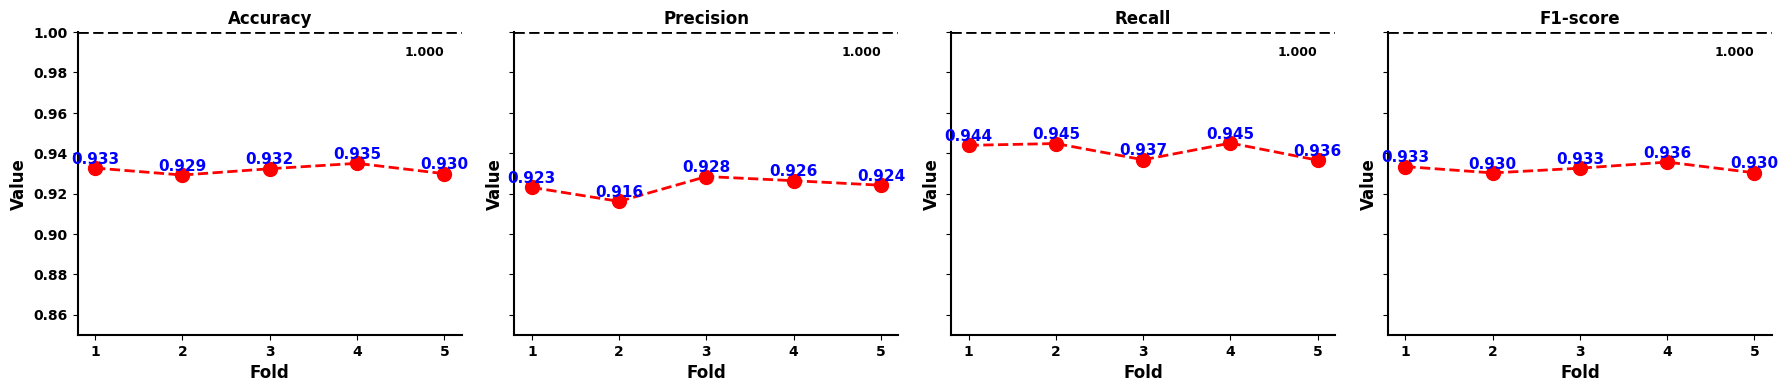

In [11]:
# Extract the number of folds from the StratifiedKFold object
num_folds = skf.n_splits

# Function to format and plot each subplot
def format_plot(ax, data, title, marker, markersize):
    ax.plot(range(1, num_folds + 1), data, marker=marker, markersize=10, color='red', linestyle='--', lw=2)
    ax.set_title(title, **fontprops)
    ax.set_xlabel('Fold', **fontprops)
    ax.xaxis.label.set_fontsize(12)  # Set x-axis label font size
    ax.xaxis.label.set_fontweight('bold')  # Set x-axis label font weight to bold
    ax.set_ylabel('Value', **fontprops)
    ax.yaxis.label.set_fontsize(12)  # Set y-axis label font size
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.set_ylim([0.85, 1.00])  # Set y-axis range starting from 0.80
    ax.tick_params(axis='x', which='both', bottom=True, labelsize=10)  # Set x-axis tick label font size
    ax.tick_params(axis='y', which='both', left=True, labelsize=10)  # Set y-axis tick label font size
    ax.axhline(y=1.0, color='black', linestyle='--',lw=2)  # Horizontal line at y=0.900
    ax.text(num_folds, 0.99, '1.000', va='center', fontsize=9, fontweight='bold', color='black', ha='right')  # Annotate the line
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    
    # Set x-axis ticks to integer values
    ax.set_xticks(range(1, num_folds + 1))

    for i, value in enumerate(data):
        # Place values below the markers and display with two decimal places
        ax.text(i + 1, value + 0.0045, f"{value:.3f}", ha='center', va='center', fontsize=11, fontweight='bold', color='blue')

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_color('black')
        
# Create a figure with shared y-axis for all subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4), sharey=True)

# Labels and titles font properties
fontprops = {'fontsize': 12, 'fontweight': 'bold'}

# Plot each graph with different markers
format_plot(axs[0], accuracies, 'Accuracy', 'o', markersize=8)  # Square marker
format_plot(axs[1], precisions, 'Precision', 'o',markersize=8)  # Diamond marker
format_plot(axs[2], recalls, 'Recall', 'o',markersize=8)  # Triangle marker
format_plot(axs[3], f1_scores, 'F1-score', 'o',markersize=8)  # Star marker

plt.tight_layout(pad=1.0)

# Show the plot
plt.show()

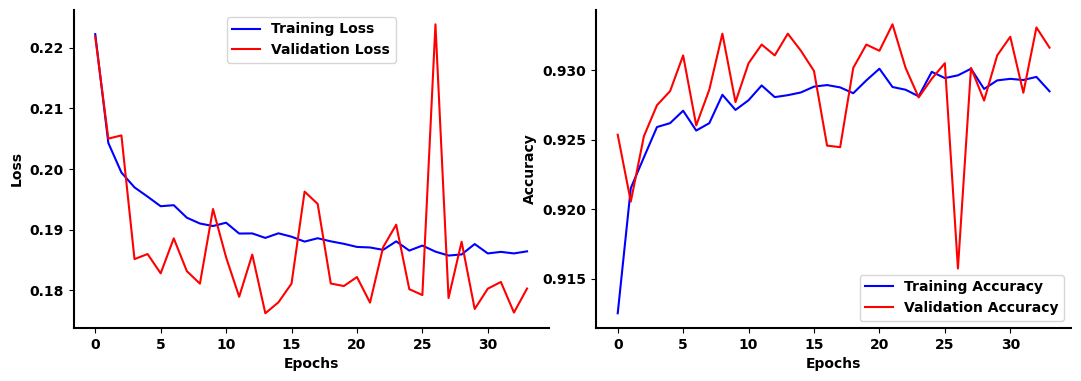

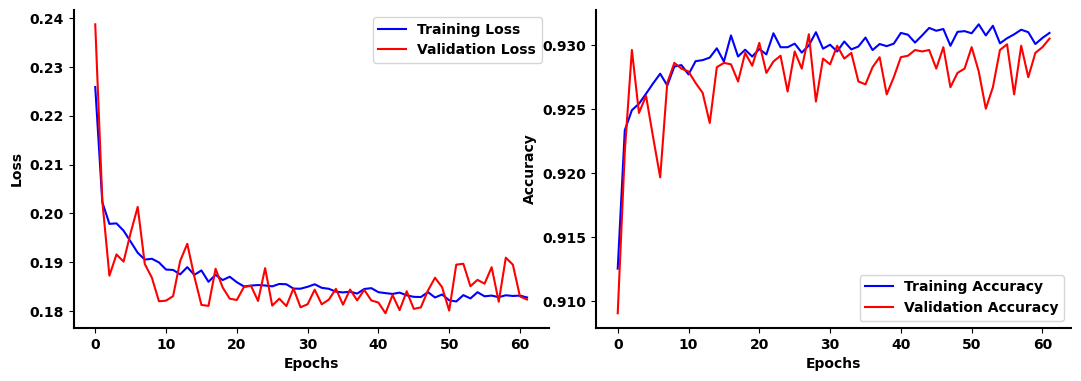

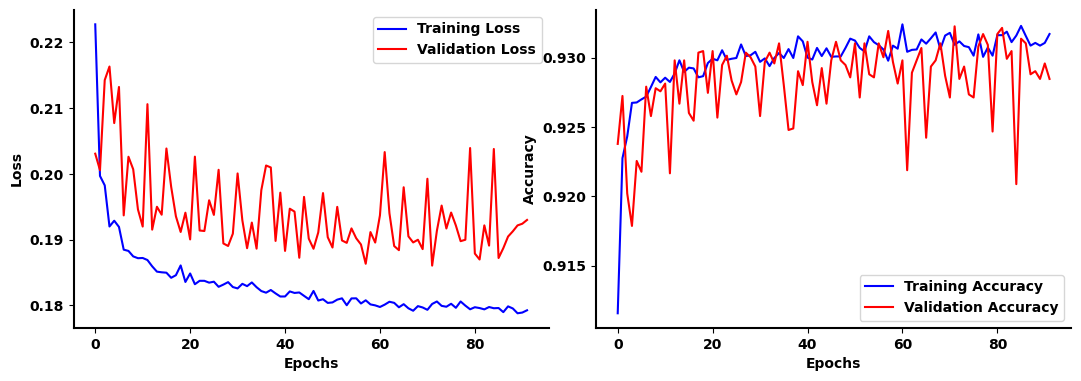

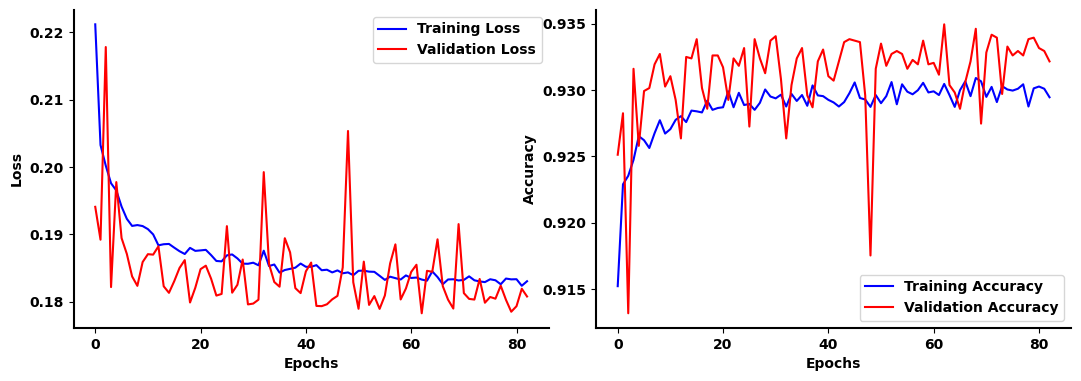

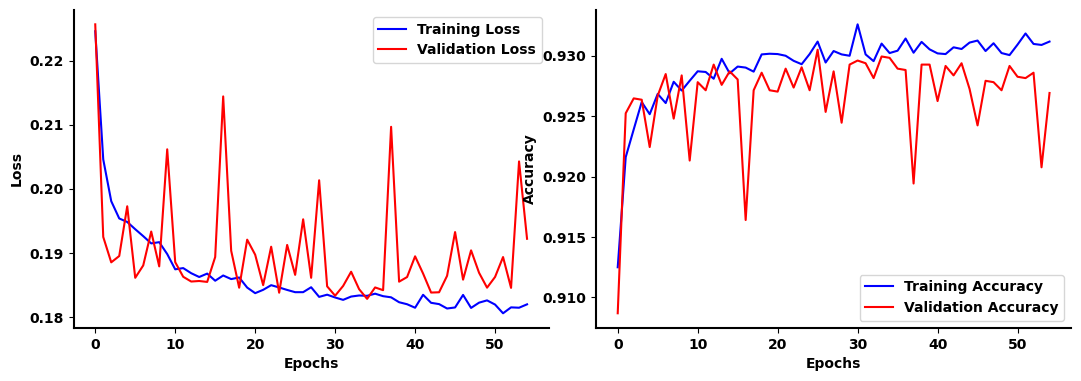

In [13]:
from matplotlib.font_manager import FontProperties
bold_font = FontProperties(weight='bold')

# 가정: loss_per_fold, val_loss_per_fold, accuracy_per_fold, val_accuracy_per_fold 리스트들이 정의되어 있음
for i in range(len(loss_per_fold)):
    plt.figure(figsize=(12, 5))

    # Training & Validation Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(loss_per_fold[i], label='Training Loss', color='blue')
    plt.plot(val_loss_per_fold[i], label='Validation Loss', color='red')
    plt.xlabel('Epochs', fontweight='bold', fontsize=10)
    plt.ylabel('Loss', fontweight='bold', fontsize=10)
    plt.legend(prop=bold_font)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)  # 왼쪽 축의 굵기 조정
    ax.spines['bottom'].set_linewidth(1.5)  # 아래쪽 축의 굵기 조정
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)
        label.set_fontweight('bold')
    plt.grid(False)

    # Training & Validation Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_per_fold[i], label='Training Accuracy', color='blue')
    plt.plot(val_accuracy_per_fold[i], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs', fontweight='bold', fontsize=10)
    plt.ylabel('Accuracy', fontweight='bold', fontsize=10)
    plt.legend(prop=bold_font)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)  # 왼쪽 축의 굵기 조정
    ax.spines['bottom'].set_linewidth(1.5)  # 아래쪽 축의 굵기 조정
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)
        label.set_fontweight('bold')
    plt.grid(False)

    plt.tight_layout(pad=5)
    plt.subplots_adjust(wspace=0.1)
    plt.show()

In [14]:
# Select final model
best_fold = np.argmax(roc_auc_scores)
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold+1}_{best_model_timestamp}.keras")
best_model = tf.keras.models.load_model(best_model_path)

# Print final model information
print(f"Final Model Selected: Fold {best_fold+1} with timestamp {best_model_timestamp}")

# Print the current working directory
print("현재 작업 디렉토리:", os.getcwd())

# List model files in the directory
print("모델 디렉토리 내 파일 목록:")
for file in os.listdir(model_save_dir):
    print(file)

Final Model Selected: Fold 1 with timestamp 2024-03-25_21-51-39
현재 작업 디렉토리: c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity
모델 디렉토리 내 파일 목록:
undersampling_kfold_1_2024-02-28_21-38-59.keras
undersampling_kfold_1_2024-02-29_21-45-19.keras
undersampling_kfold_1_2024-03-07_21-41-10.keras
undersampling_kfold_1_2024-03-12_22-34-28.keras
undersampling_kfold_1_2024-03-19_13-32-26.keras
undersampling_kfold_1_2024-03-25_21-51-39.keras
undersampling_kfold_2_2024-02-28_21-39-18.keras
undersampling_kfold_2_2024-02-29_21-49-45.keras
undersampling_kfold_2_2024-03-07_21-42-19.keras
undersampling_kfold_2_2024-03-12_22-35-03.keras
undersampling_kfold_2_2024-03-19_13-33-22.keras
undersampling_kfold_2_2024-03-25_21-52-12.keras
undersampling_kfold_3_2024-02-28_21-39-36.keras
undersampling_kfold_3_2024-02-29_21-53-14.keras
undersampling_kfold_3_2024-03-07_21-43-00.keras
undersampling_kfold_3_2024-03-12_22-35-34.keras
undersampling_kfold_3_2024-03-19_13-33-56.keras
undersampling_kfold_3_2024-

Epoch 1/200
1399/1399 [==============================] - 2s 872us/step - loss: 0.1881 - accuracy: 0.9289 - val_loss: 0.1872 - val_accuracy: 0.9296 - lr: 0.0100
Epoch 2/200
1399/1399 [==============================] - 1s 815us/step - loss: 0.1872 - accuracy: 0.9293 - val_loss: 0.1873 - val_accuracy: 0.9301 - lr: 0.0100
Epoch 3/200
1399/1399 [==============================] - 1s 827us/step - loss: 0.1873 - accuracy: 0.9287 - val_loss: 0.1874 - val_accuracy: 0.9303 - lr: 0.0100
Epoch 4/200
1399/1399 [==============================] - 1s 807us/step - loss: 0.1859 - accuracy: 0.9296 - val_loss: 0.1868 - val_accuracy: 0.9296 - lr: 0.0100
Epoch 5/200
1399/1399 [==============================] - 1s 804us/step - loss: 0.1863 - accuracy: 0.9294 - val_loss: 0.1857 - val_accuracy: 0.9300 - lr: 0.0100
Epoch 6/200
1399/1399 [==============================] - 1s 802us/step - loss: 0.1862 - accuracy: 0.9296 - val_loss: 0.1887 - val_accuracy: 0.9273 - lr: 0.0100
Epoch 7/200
1399/1399 [=================

C:\Users\Jun-Hyun Bae\AppData\Local\Temp\ipykernel_12992\2690652067.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(indicators, fontweight='bold')


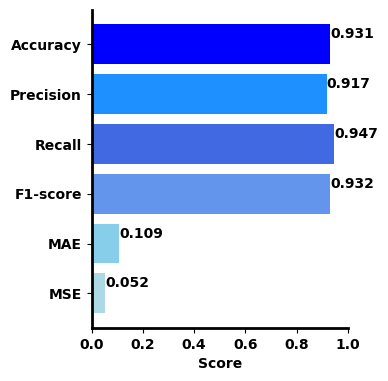

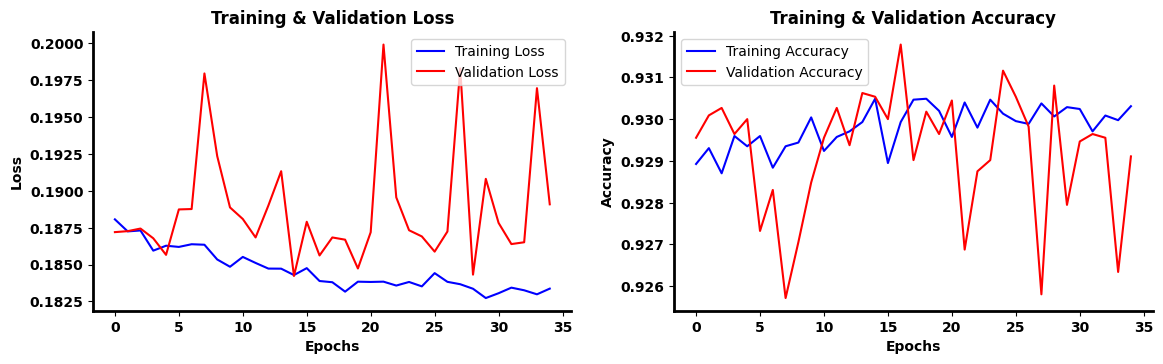

350/350 [==============================] - 0s 484us/step


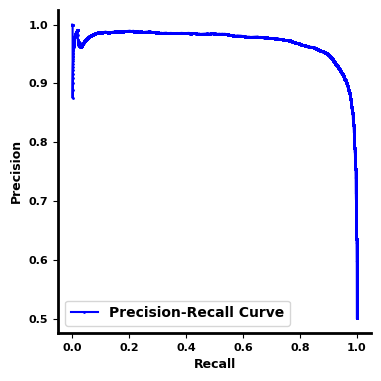

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.colors as mcolors
import scikitplot as skplt

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 모델 로드
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'
best_fold = 1
best_model_timestamp = "2024-03-25_21-51-39"
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")
best_model = tf.keras.models.load_model(best_model_path)

# 조기 중단 및 학습률 감소 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.01)

# 모델 컴파일 (필요한 경우)
optimizer = Adam(learning_rate=0.01)  # Adjust the learning rate
best_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 추가 학습 진행
history = best_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on test data
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Define the performance indicators and their values
indicators = ["Accuracy", "Precision", "Recall", "F1-score", "MAE", "MSE"]
values = [accuracy, precision, recall, f1, mae, mse]

# Define a list of colors for the bars with a gradient effect
colors = ['#0000FF', '#1E90FF', '#4169E1', '#6495ED', '#87CEEB', '#ADD8E6']  # Gradient of blue colors

# Create a bar graph for performance metrics
plt.figure(figsize=(5, 5))
ax = plt.gca()
bars = ax.barh(indicators, values, color=colors)
plt.barh(indicators, values, color=colors)
ax.set_xlabel('Score', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# Set y-axis labels to bold
ax.set_yticklabels(indicators, fontweight='bold')
plt.xlabel('Score')
#plt.title('Performance on Test Data')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

# Set x-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Annotate each bar with its value
for bar, value in zip(bars, values):
    text = f"{value:.3f}"
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 4, text, va='center', ha='left', color='black', fontweight='bold')

# Show the bar graph
plt.tight_layout(pad=5.0)
plt.show()

# Train the model and capture the training history (epochs can be adjusted)
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], label='Training Loss', color='blue')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax1.set_xlabel('Epochs', fontweight='bold')  # Make x-axis label bold
ax1.set_ylabel('Loss', fontweight='bold')  # Make y-axis label bold
ax1.set_title('Training & Validation Loss', fontweight='bold')  # Make title bold
ax1.legend()  # Hide the legend

# Set x-axis tick labels to bold
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')  # Set color of tick labels

# Set y-axis tick labels to bold and highlight their color
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')

# Hide top and right spines in ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Plot training & validation accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax2.set_xlabel('Epochs', fontweight='bold')  # Make x-axis label bold
ax2.set_ylabel('Accuracy', fontweight='bold')  # Make y-axis label bold
ax2.set_title('Training & Validation Accuracy', fontweight='bold')  # Make title bold
ax2.legend()

# Hide top and right spines in ax2
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2)

# Set x-axis tick labels to bold
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')  # Set color of tick labels

# Set y-axis tick labels to bold and highlight their color
for label in ax2.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')

# Show the plots
plt.tight_layout(pad=2.0)
plt.show()

# Assuming y_pred contains model prediction probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Evaluate the model on test data
y_pred = best_model.predict(X_test).ravel()

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(5, 5))
ax = plt.gca()
plt.plot(recall, precision, marker='.', markersize=2, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall', fontweight='bold',fontsize=9)
plt.ylabel('Precision', fontweight='bold',fontsize=9)
#plt.title(f'Precision-Recall Curve for Fold {fold}')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
    label.set_color('black')
plt.legend(loc="lower left", prop={'weight': 'bold', 'size': 10})
plt.tight_layout(pad=5.0)
plt.show()

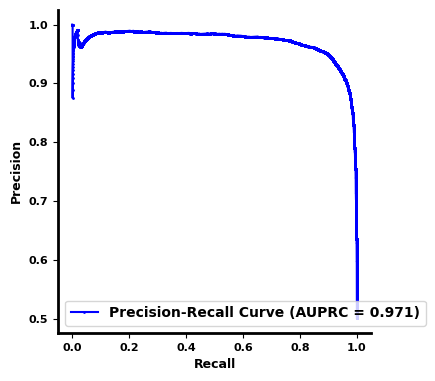

In [16]:
from sklearn.metrics import average_precision_score

# Assuming 'recall', 'precision', and 'y_test' are defined, and 'y_pred' contains the predicted probabilities
# Calculate the AUPRC
auprc = average_precision_score(y_test, y_pred)

plt.figure(figsize=(5, 5))
ax = plt.gca()
plt.plot(recall, precision, marker='.', markersize=2, color='blue', label=f'Precision-Recall Curve (AUPRC = {auprc:.3f})')
plt.xlabel('Recall', fontweight='bold', fontsize=9)
plt.ylabel('Precision', fontweight='bold', fontsize=9)
# Optional: Add AUPRC to the title if you prefer
# plt.title(f'Precision-Recall Curve (AUPRC = {auprc:.3f})', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
    label.set_color('black')
plt.legend(loc="lower left", prop={'weight': 'bold', 'size': 10})
plt.tight_layout(pad=5.0)
plt.show()


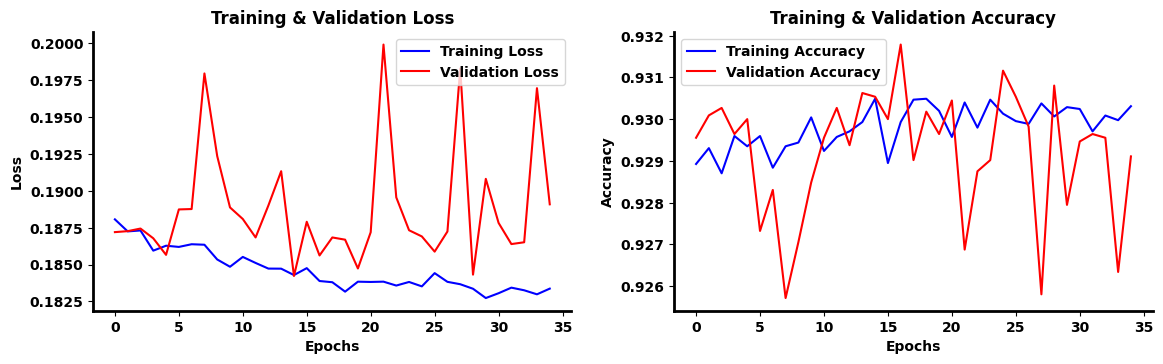

In [17]:
from matplotlib.font_manager import FontProperties

# Define bold font properties
bold_font = FontProperties(weight='bold')

# Train the model and capture the training history (epochs can be adjusted)
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], label='Training Loss', color='blue')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax1.set_xlabel('Epochs', fontweight='bold')  # Make x-axis label bold
ax1.set_ylabel('Loss', fontweight='bold')  # Make y-axis label bold
ax1.set_title('Training & Validation Loss', fontweight='bold')  # Make title bold
ax1.legend(prop=bold_font)  # Hide the legend

# Set x-axis tick labels to bold
for label in ax1.get_xticklabels():
    label.set_fontweight('bold')

# Set y-axis tick labels to bold and highlight their color
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')

# Hide top and right spines in ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Plot training & validation accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax2.set_xlabel('Epochs', fontweight='bold')  # Make x-axis label bold
ax2.set_ylabel('Accuracy', fontweight='bold')  # Make y-axis label bold
ax2.set_title('Training & Validation Accuracy', fontweight='bold')  # Make title bold
ax2.legend(prop=bold_font)

# Hide top and right spines in ax2
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2)

# Set x-axis tick labels to bold
for label in ax2.get_xticklabels():
    label.set_fontweight('bold')

# Set y-axis tick labels to bold and highlight their color
for label in ax2.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')

# Show the plots
plt.tight_layout(pad=2.0)
plt.show()

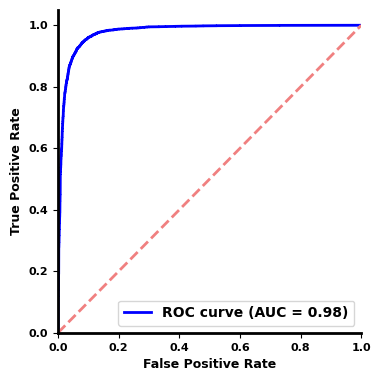

In [18]:
# # ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightcoral', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=9)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=9)
#plt.title('Receiver Operating Characteristic (ROC) Curve in Best Model', fontweight='bold', fontsize=9)

# Move the legend to the lower right corner and make its contents bold
plt.legend(loc='lower right', prop={'weight': 'bold', 'size': 10})

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set x-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')

# Set y-axis tick labels to bold and highlight their color
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('8')
    label.set_color('black')

# Display the graph
plt.tight_layout(pad=5.0)
plt.show()

In [ ]:
cm = confusion_matrix(y_val_fold, y_pred_classes_val)
    total = np.sum(cm)
    cm_percentage = cm / total * 100
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_percentages = ["{0:.2f}%".format(value) for value in cm_percentage.flatten()]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    # Function to choose text color based on background color
    def get_text_color(value, threshold=40):  # Adjust the threshold as needed
        return "black" if value <= threshold else "white"

    plt.figure(figsize=(3, 3))
    ax = sns.heatmap(cm, cmap='Blues',
                 xticklabels=['Normal', 'Sarcopenic\nObesity'],
                 yticklabels=['Normal', 'Sarcopenic\nObesity'],)

    # Custom annotations with different font sizes and colors
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = cm_percentage[i, j]
            text_color = get_text_color(value)
            plt.text(j + 0.5, i + 0.5,
                 f"{group_percentages[i * 2 + j]}\n{group_names[i * 2 + j]}\n",
                 ha="center", va="center", fontweight="bold", color=text_color)
            plt.text(j + 0.5, i + 0.5 + 0.25,
                 f"(n={group_counts[i * 2 + j]})",
                 ha="center", va="center", fontsize=8, fontweight="bold", color=text_color)

    # Create the confusion matrix plot
    plt.xlabel('Predicted Label', fontweight='bold',fontsize='10')
    plt.ylabel('True Label', fontweight='bold',fontsize='10')

    # Make the tick labels on both axes bold
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold',fontsize='8')
    ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold',fontsize='8')

    #plt.title('Confusion Matrix', fontdict={'fontsize': 5, 'fontweight': 'bold'})

    plt.tight_layout(pad=2)
    plt.show()

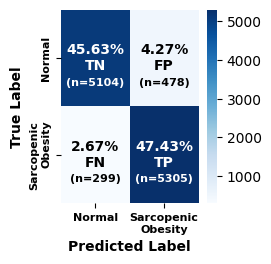

In [18]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

# 예측 클래스를 계산합니다 (이미 위에서 계산했으므로 재사용합니다)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Confusion matrix를 계산합니다
cm = confusion_matrix(y_test, y_pred_classes)
total = np.sum(cm)
cm_percentage = cm / total * 100

group_names = ['TN', 'FP', 'FN', 'TP']
group_percentages = ["{0:.2f}%".format(value) for value in cm_percentage.flatten()]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

def get_text_color(value, threshold=40):  # Adjust the threshold as needed
    return "black" if value <= threshold else "white"

plt.figure(figsize=(3, 3))
ax = sns.heatmap(cm, cmap='Blues',
                 annot=False, fmt='g',
                 xticklabels=['Normal', 'Sarcopenic\nObesity'],
                 yticklabels=['Normal', 'Sarcopenic\nObesity'],)


# 커스텀 어노테이션
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm_percentage[i, j]
        text_color = get_text_color(value)
        plt.text(j + 0.5, i + 0.5,
                 f"{group_percentages[i * 2 + j]}\n{group_names[i * 2 + j]}",
                 ha="center", va="center", fontweight="bold", color=text_color)
        plt.text(j + 0.5, i + 0.5 + 0.25,
                 f"(n={group_counts[i * 2 + j]})",
                 ha="center", va="center", fontsize=8, fontweight="bold", color=text_color)

# 축 레이블 설정
plt.xlabel('Predicted Label', fontweight='bold', fontsize='10')
plt.ylabel('True Label', fontweight='bold', fontsize='10')

# 축 눈금 레이블 설정
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', fontsize='8')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize='8')

plt.tight_layout(pad=2)
plt.show()

1399/1399 [==============================] - 1s 479us/step
MAE: 0.0647
MSE: 0.0257
R2: 0.8970


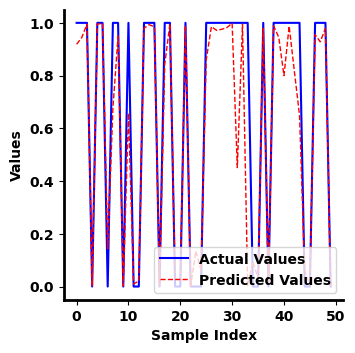

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델이 저장된 디렉토리 경로 설정
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'
best_fold = 1
best_model_timestamp = "2024-03-19_13-32-26"
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")

# 저장된 모델 로드
best_model = tf.keras.models.load_model(best_model_path)

# 모델 성능 평가
predicted_values = best_model.predict(X_train_scaled)
predicted_values = predicted_values.flatten()

# Convert y_train to a NumPy array and then reshape
y_train_array = y_train.values.reshape(-1)

# y_train을 NumPy 배열로 변환하고 flatten 메서드 적용
y_train_flattened = y_train.values.flatten()

# 예측값과 실제값을 함께 저장할 데이터프레임 생성
comparison = pd.DataFrame({'Predicted Values': predicted_values,
                           'Actual Values': y_train_array})

# 예측값과 실제값을 함께 출력
#print(comparison)
num_samples = 50  # 표시할 샘플 수
sample_indices = np.random.choice(range(len(y_train)), num_samples, replace=True)  # 무작위로 샘플 인덱스 선택

# 선택된 샘플들의 예측값과 실제값 추출
actual_sample = y_train.iloc[sample_indices]
predicted_sample = predicted_values[sample_indices]

# 예측 결과와 실제값의 차이 계산
mae = mean_absolute_error(actual_sample, predicted_sample)
mse = mean_squared_error(actual_sample, predicted_sample)
r2 = r2_score(actual_sample, predicted_sample)

# MAE, MSE, R2 출력
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")


# Set the figure size
plt.figure(figsize=(5, 5))  # Example: 8 inches wide by 6 inches tall


# Your existing plotting code
plt.plot(comparison['Actual Values'][:50], label='Actual Values', color='blue', linewidth=1.5)
plt.plot(comparison['Predicted Values'][:50], label='Predicted Values', color='red', linestyle='--', linewidth=1)
plt.xlabel('Sample Index', fontweight='bold')
plt.ylabel('Values', fontweight='bold', color='black')
#plt.title('Comparison of Actual and Predicted Values in Best Model (First 50 Samples)', fontsize='9',fontweight='bold')
plt.legend()

# Move the legend to the lower right corner
plt.legend(loc='lower right',prop={'weight': 'bold'})

# Code to remove top and right spines and make x-axis labels bold
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set x-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set y-axis tick labels to bold and highlight their color
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color('black')

# Display the graph
plt.tight_layout(pad=6)
plt.show()

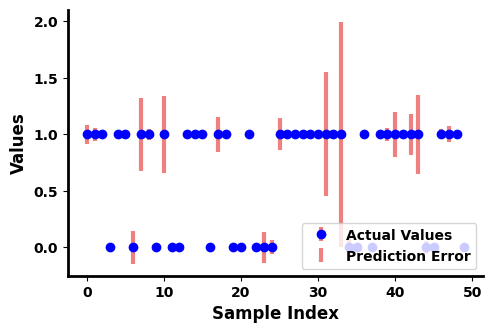

In [20]:
# 오차 막대 그래프
# Assuming 'comparison' is a DataFrame with 'Actual Values' and 'Predicted Values' columns
# Calculate the absolute error for the first 100 data points
error = np.abs(comparison['Predicted Values'][:50] - comparison['Actual Values'][:50])

# Create an error bar graph for the first 100 data points, with labels for the legend
plt.errorbar(x=np.arange(50), y=comparison['Actual Values'][:50], yerr=error, fmt='o', color='blue', ecolor='lightcoral', elinewidth=3, capsize=0, label='Actual Values')

# Create a custom legend entry for the error bars
plt.errorbar([], [], yerr=[], fmt='o', color='none', ecolor='lightcoral', elinewidth=3, capsize=0, label='Prediction Error')

# Create the legend with bold labels
plt.legend(prop={'weight': 'bold'})

# Set the xlabel and ylabel with bold font weight
plt.xlabel('Sample Index', fontweight='bold')
plt.ylabel('Values', fontweight='bold')

# Set the title with a bold font weight
#plt.title('Error Bar Graph of Actual and Predicted Values (First 50 Samples)', fontweight='bold')

# Create the legend
plt.legend()
plt.legend(loc='lower right',prop={'weight': 'bold'})

# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the x-axis and y-axis thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Make the x-axis and y-axis labels thicker
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

# Make the title font larger and bolder
ax.title.set_fontsize(14)
ax.title.set_fontweight('bold')

# Make the tick labels bold
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Display the graph
plt.tight_layout(pad=6)
plt.show()

In [18]:
import os
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# 언더샘플링 적용
#rus = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X, y)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 최고의 모델 로드
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'
best_fold = 1
best_model_timestamp = "2024-03-07_21-41-10"
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")
best_model = tf.keras.models.load_model(best_model_path)

# 테스트 데이터셋에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 예측 결과를 실제 레이블과 같은 형태로 변환 (이진 분류의 경우)
y_pred = np.round(y_pred).astype(int).flatten()

# 실제 값과 예측 값을 비교하여 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


350/350 [==============================] - 0s 488us/step
Accuracy: 0.95
Confusion Matrix:
 [[5322  260]
 [ 316 5288]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      5582
         1.0       0.95      0.94      0.95      5604

    accuracy                           0.95     11186
   macro avg       0.95      0.95      0.95     11186
weighted avg       0.95      0.95      0.95     11186



350/350 [==============================] - 0s 535us/step


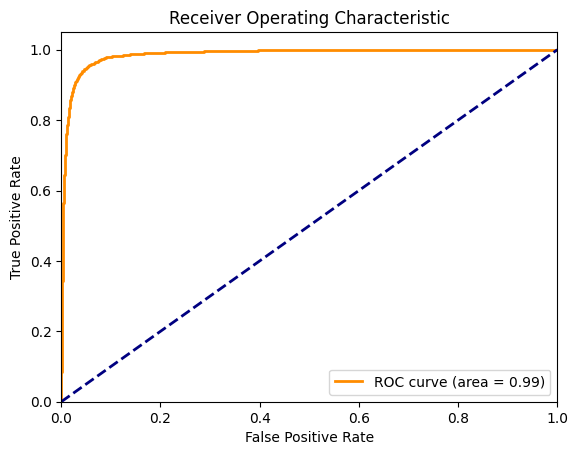

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측 확률 계산 (양성 클래스에 대한 확률)
y_pred_probs = best_model.predict(X_test)[:, 0]

# ROC 곡선의 계산을 위한 실제값과 예측 확률
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


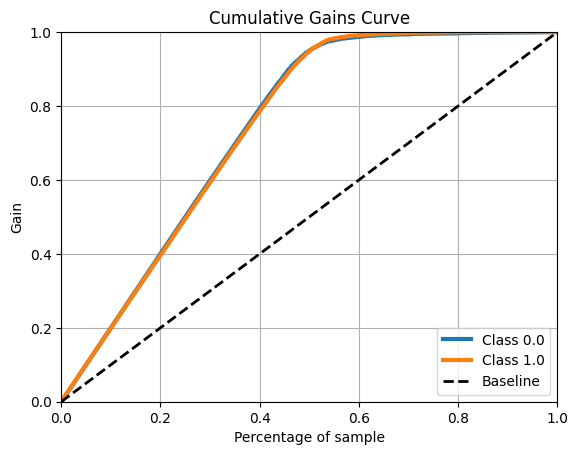

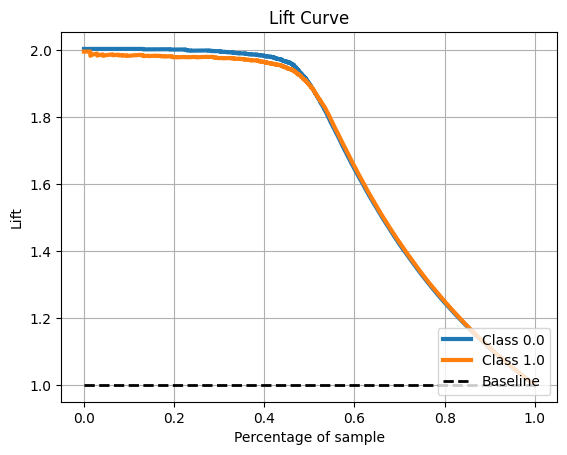

In [21]:
from scikitplot.metrics import plot_cumulative_gain

# 라벨이 이진 분류인 경우, y_test와 y_pred_probs(모델의 예측 확률)를 사용
# 예측 확률이 1차원인 경우 2차원으로 변환
if y_pred_probs.ndim == 1:
    y_pred_probs = np.vstack([1 - y_pred_probs, y_pred_probs]).T

# 누적 이득 차트 그리기
plot_cumulative_gain(y_test, y_pred_probs)
plt.show()





from scikitplot.metrics import plot_lift_curve

# 라벨이 이진 분류인 경우, y_test와 y_pred_probs(모델의 예측 확률)를 사용
plot_lift_curve(y_test, y_pred_probs)
plt.show()


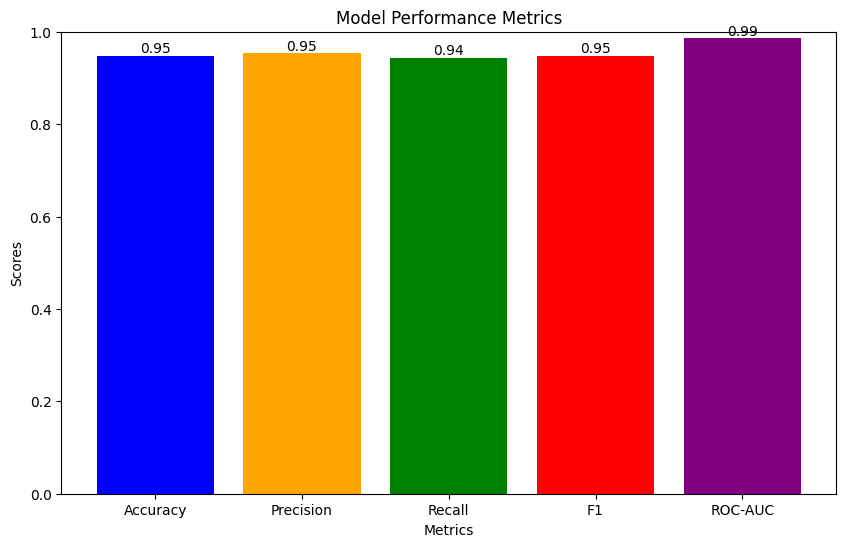

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])  # y_pred_probs는 모델의 예측 확률입니다.


# ROC-AUC 점수 계산을 위해 양성 클래스에 대한 확률만 사용
# 여기서 y_pred_probs[:, 1]는 양성 클래스에 대한 확률을 의미합니다.
# 만약 양성 클래스가 첫 번째 열에 있다면 y_pred_probs[:, 0]를 사용합니다.
# roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# 나머지 코드는 동일하게 사용됩니다.

# 성능 지표 시각화
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
scores = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
for i, score in enumerate(scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom')
plt.show()

